In [1]:
import pandas as pd
import numpy as np
import copy

In [2]:
data=pd.read_csv("./Data/BankChurners.csv")

In [3]:
data['Attrition_Flag'] = data['Attrition_Flag'].map({1: 'Existing Customer', 0: 'Attrited Customer'})


In [4]:
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE

# X = data.loc[:, data.columns != 'Attrition_Flag']
# y = data['Attrition_Flag']
# x, x_test, y, y_test = train_test_split(X, y,test_size=0.2,train_size=0.8)
# x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size = 0.25,train_size =0.75)


# sm = SMOTE(sampling_strategy=0.5, k_neighbors=20, random_state=42)
# X_train_res, y_train_res = sm.fit_resample(x_train, y_train)



In [5]:
# BankChurners.shape

In [6]:
# X_train_res.head()

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# # print)str
# scaled_x_train=pd.read_csv("./Data/scaled_x_train_smote2.csv")
# scaled_x_test=pd.read_csv("./Data/scaled_x_test_smote2.csv")
# # pd.read_csv("./Data/scaled_x_test_smote2.csv")
# scaled_x_cv=pd.read_csv("./Data/scaled_x_cv_smote2.csv")

y_test_copy=pd.read_csv("./Data/y_test_smote3.csv")
x_test=pd.read_csv("./Data/x_test_smote3.csv")

X_train_res=pd.read_csv("./Data/X_train_res_smote3.csv")
y_train_res=pd.read_csv("./Data/y_train_res_smote3.csv")

X_train_res=X_train_res.drop('Unnamed: 0',axis=1)
y_train_res=y_train_res.drop('Unnamed: 0',axis=1)
x_test=x_test.drop('Unnamed: 0',axis=1)


y_test_copy=y_test_copy.drop('Unnamed: 0',axis=1)
# scaled_x_test=scaled_x_test.drop('Unnamed: 0',axis=1)
# scaled_x_cv=scaled_x_cv.drop('Unnamed: 0',axis=1)


y_test=y_test_copy

y_valid=pd.read_csv("./Data/y_valid_smote3.csv")
x_valid=pd.read_csv("./Data/x_valid_smote3.csv")

x_valid=x_valid.drop('Unnamed: 0',axis=1)
y_valid=y_valid.drop('Unnamed: 0',axis=1)

y_valid.shape




y_train_res['Attrition_Flag']=y_train_res['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})
y_valid['Attrition_Flag']=y_valid['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})
y_test_copy['Attrition_Flag']=y_test_copy['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})



In [8]:
#  Scaling features
scaler = StandardScaler()
scaler.fit(X_train_res)

scaled_x_train = scaler.transform(X_train_res)
scaled_x_test = scaler.transform(x_test)


scaled_x_valid=scaler.transform(x_valid)
# scaled_y_cv =scaler.transform(y_cv)

scaled_x_train.shape
input_shape=[scaled_x_train.shape[1]]

In [52]:
scaled_x_train.shape

(7675, 32)

In [9]:
# scaled_x_train.head()
X_train_res.head()

Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         6                       6                      1   
1                         3                       3                      2   
2                         1                       3                      2   
3                         1                       1                      2   
4                         2                       3                      3   

   Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0                 1420                 0.762             4256              70   
1                    0                 0.628            14134              85   
2                 1816                 0.978            15554              99   
3                 1978                 0.917            14965             127   
4                  751                 0.814            14074             112   

   Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Gender_F  ...  \
0                0.591                  0.645         1  ...   
1                0.700                  0.000         0  ...   
2                0.678                  0.128         0  ...   
3                0.716                  0.636         1  ...   
4                0.623                  0.039         0  ...   

   Income_Category_$120K +  Income_Category_$40K - $60K  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        1                            0   

   Income_Category_$60K - $80K  Income_Category_$80K - $120K  \
0                            0                             0   
1                            0                             1   
2                            1                             0   
3                            0                             0   
4                            0                             0   

   Income_Category_Less than $40K  Income_Category_Unknown  \
0                               1                        0   
1                               0                        0   
2                               0                        0   
3                               1                        0   
4                               0                        0   

   Card_Category_Blue  Card_Category_Gold  Card_Category_Platinum  \
0                   1                   0                       0   
1                   1                   0                       0   
2                   1                   0                       0   
3                   1                   0                       0   
4                   1                   0                       0   

   Card_Category_Silver  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 32 columns]

In [61]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(scaled_x_train)
print(len(kmeans.labels_))

7675


In [60]:
# from sklearn.cluster import KMeans
# import numpy as np
# X = np.array([[1, 2], [1, 4], [1, 0],
#               [10, 2], [10, 4], [10, 0]])
# print(X.shape)
# kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
# print(kmeans.labels_)

# kmeans.predict(X)

# # kmeans.cluster_centers_

(6, 2)
[1 1 1 0 0 0]


array([1, 1, 1, 0, 0, 0], dtype=int32)

In [53]:
kmeans.n_features_in_

32

In [66]:
kmeans.predict(scaled_x_train)

array([1, 0, 0, ..., 0, 1, 0], dtype=int32)

WCSS is the sum of squared distances from each point to its assigned center(distortions)

ValueError: x and y must have same first dimension, but have shapes (29,) and (28,)

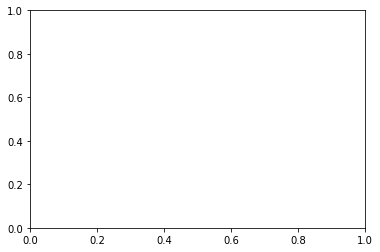

In [79]:
wcss = []
sscore=[]
for i in range(2, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_x_train)
    wcss.append(kmeans.inertia_)
    sscore.append(silhouette_score(scaled_x_train, kmeans.labels_, metric='euclidean'))
#
# Print the score
#
# print('Silhouetter Score: %.3f' % score)


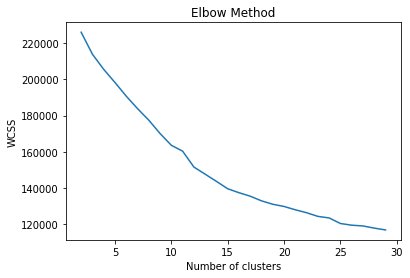

In [80]:
plt.plot(range(2, 30), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

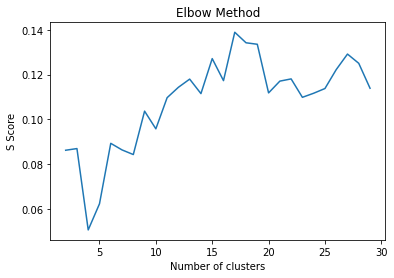

In [81]:
plt.plot(range(2, 30), sscore)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('S Score')
plt.show()

In [94]:
divmod(5,2)

(2, 1)

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

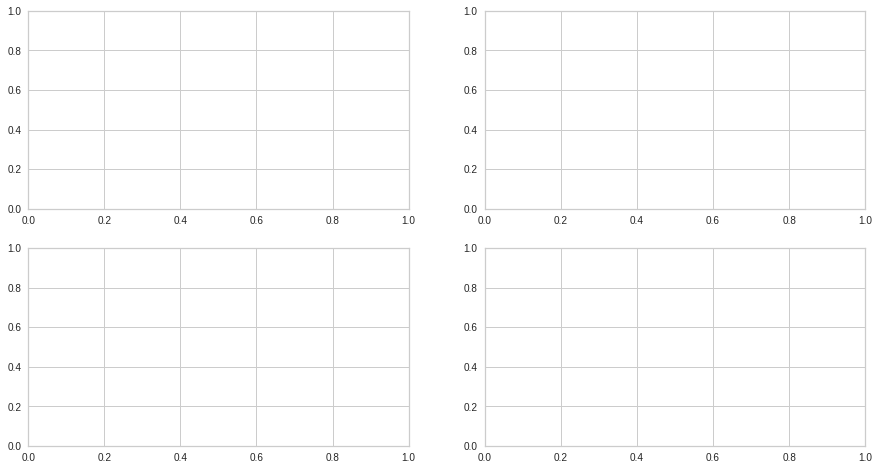

In [96]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
ax

In [98]:
divmod(1, 2)

(0, 1)

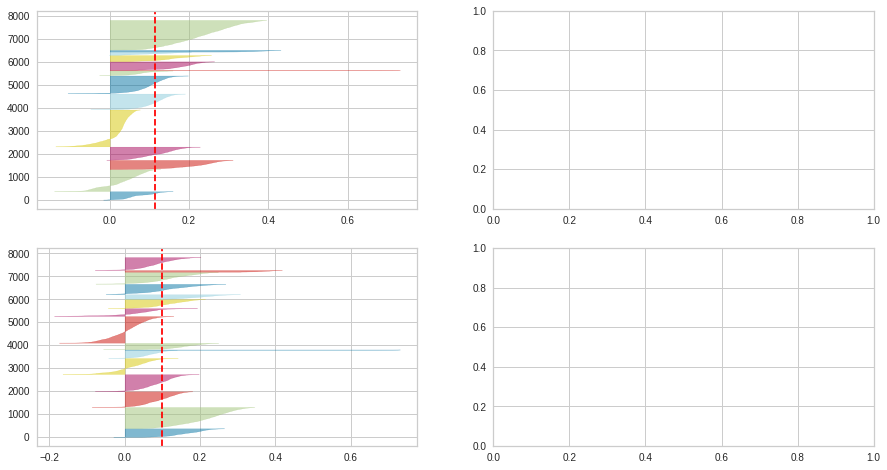

In [101]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [14,16]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i-12, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_x_train)

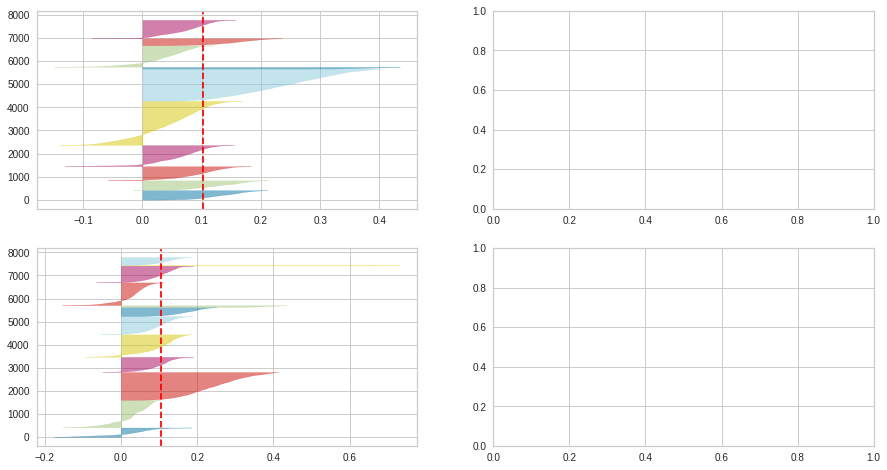

In [100]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [10,12]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i-8, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_x_train)

Feature: 0, Score: 0.07241
Feature: 1, Score: 0.00898
Feature: 2, Score: 0.01266
Feature: 3, Score: 0.12625
Feature: 4, Score: 0.05015
Feature: 5, Score: 0.19385
Feature: 6, Score: 0.41246
Feature: 7, Score: 0.06467
Feature: 8, Score: 0.01348
Feature: 9, Score: 0.00078
Feature: 10, Score: 0.01063
Feature: 11, Score: 0.00277
Feature: 12, Score: 0.00121
Feature: 13, Score: 0.00302
Feature: 14, Score: 0.00263
Feature: 15, Score: 0.00150
Feature: 16, Score: 0.00201
Feature: 17, Score: 0.00089
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00599
Feature: 20, Score: 0.00118
Feature: 21, Score: 0.00066
Feature: 22, Score: 0.00149
Feature: 23, Score: 0.00130
Feature: 24, Score: 0.00152
Feature: 25, Score: 0.00221
Feature: 26, Score: 0.00162
Feature: 27, Score: 0.00174
Feature: 28, Score: 0.00053
Feature: 29, Score: 0.00054
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00087


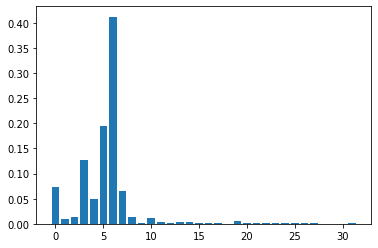

In [74]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
# X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(scaled_x_train,y_train_res)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [115]:
kmeanModel= KMeans(n_clusters=16, init='k-means++', max_iter=1000, n_init=10, random_state=0)
kmeanModel.fit(scaled_x_train)

KMeans(max_iter=1000, n_clusters=16, random_state=0)

In [108]:
# scaled_x_train[:,5].shape
kmeanModel.predict(scaled_x_train)
y_train_res.shape

(7675, 1)

In [122]:
df=pd.DataFrame(columns=X_train_res.columns)
df.shape

(0, 32)

In [124]:
df=pd.DataFrame(scaled_x_train)
df.columns=X_train_res.columns


In [125]:

#                 ['k_means','target','1','2','3','4','5'])
# df['5']=scaled_x_train[:,5]
# df['6']=scaled_x_train[:,6]
df['k_means']=kmeanModel.predict(scaled_x_train)
df['target']=y_train_res
print(df.shape)

(7675, 34)


In [131]:
df.iloc[:,i]

0       3.766322
1       0.664098
2       0.664098
3      -1.404051
4       0.664098
          ...   
7670   -0.369976
7671   -0.369976
7672   -0.369976
7673   -0.369976
7674   -0.369976
Name: Months_Inactive_12_mon, Length: 7675, dtype: float64

In [133]:
df.columns

Index(['Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Gender_F', 'Gender_M',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver', 'k_means', 'target'],
      dtype='object')

In [144]:
df.iloc[:,i]

0       3.766322
1       0.664098
2       0.664098
3      -1.404051
4       0.664098
          ...   
7670   -0.369976
7671   -0.369976
7672   -0.369976
7673   -0.369976
7674   -0.369976
Name: Months_Inactive_12_mon, Length: 7675, dtype: float64

In [139]:
axes[0].scatter(df.iloc[1], df.iloc[2], c=df['target'])

ValueError: 'c' argument has 7675 elements, which is inconsistent with 'x' and 'y' with size 34.

/home/dheekshitha-vibha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


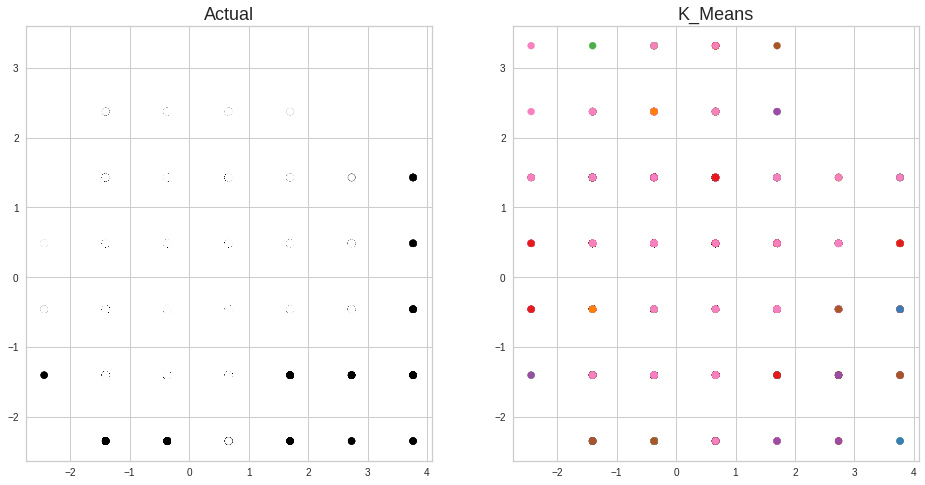

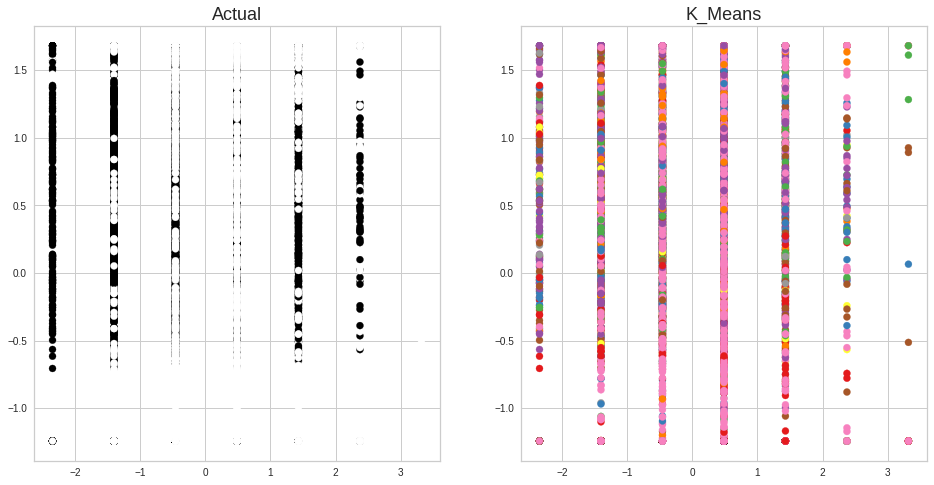

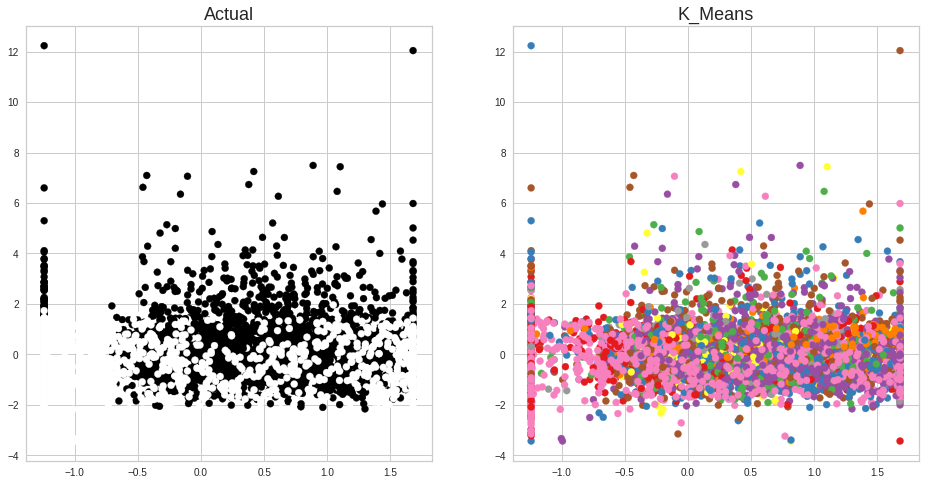

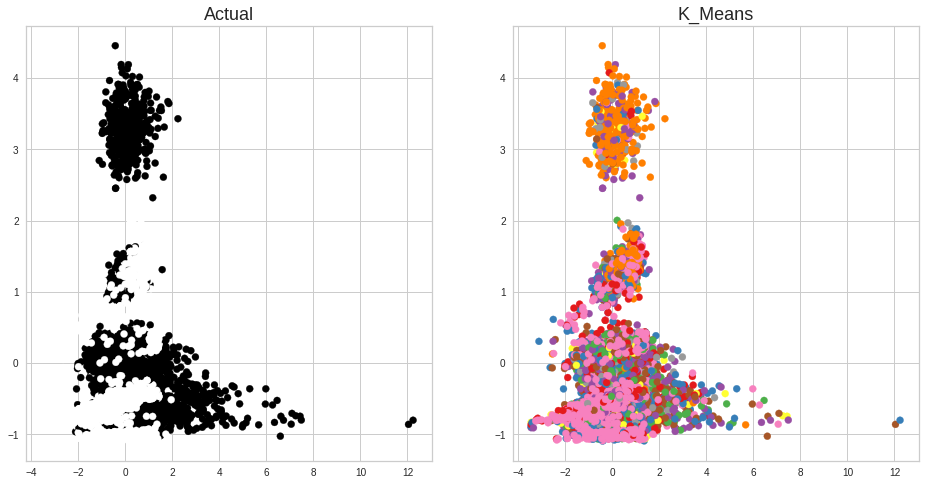

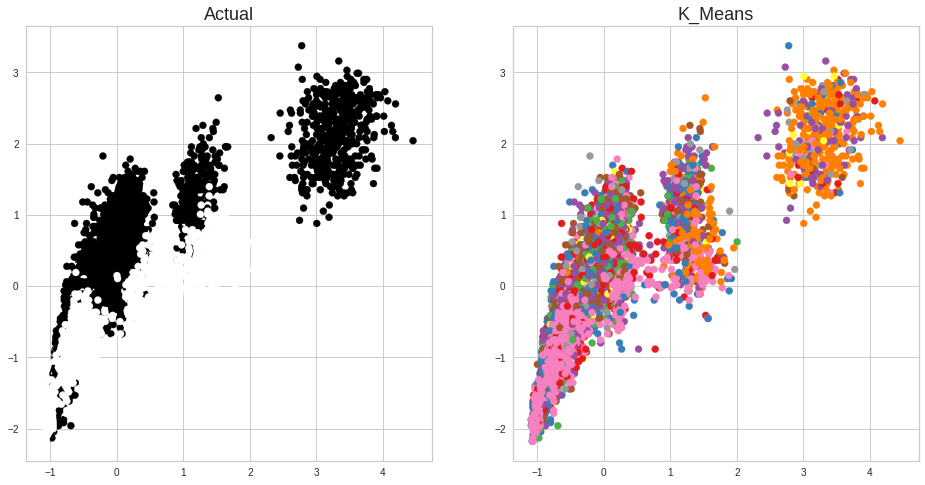

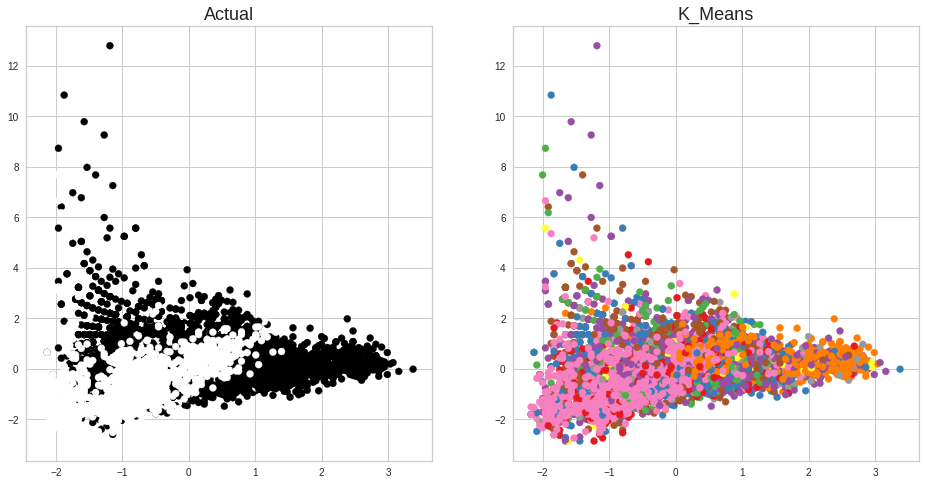

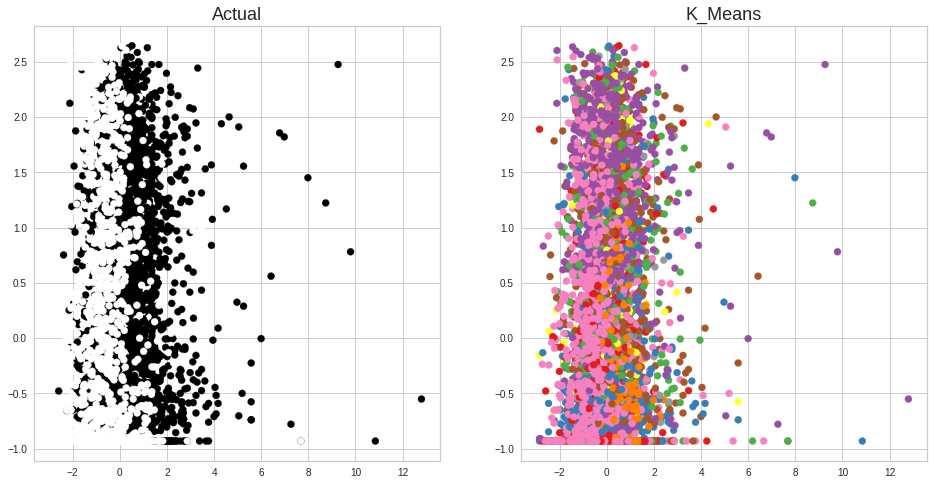

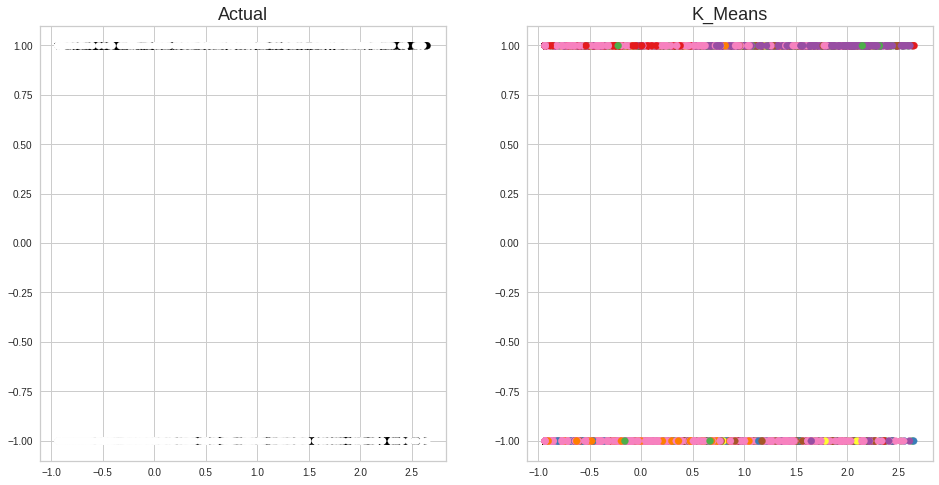

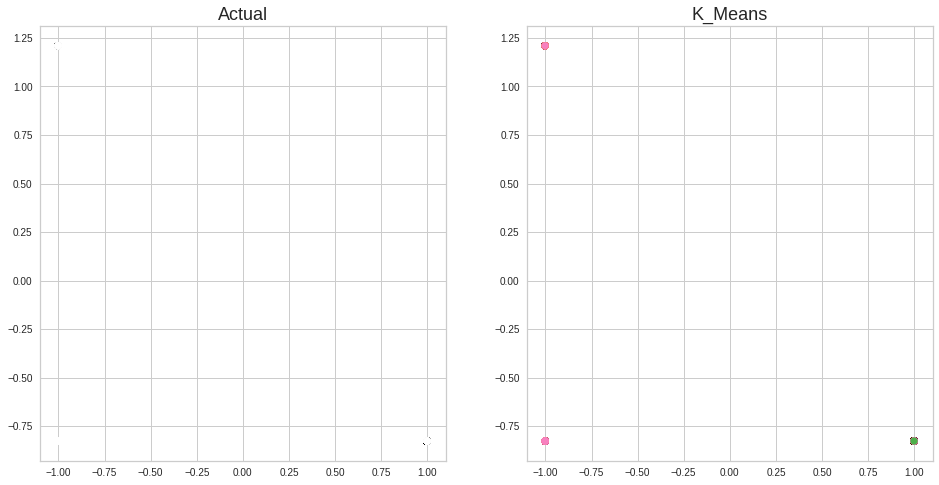

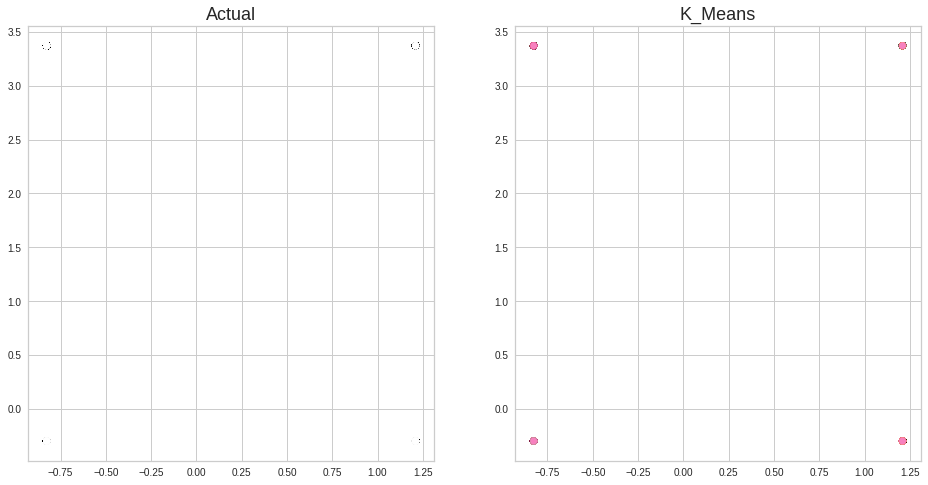

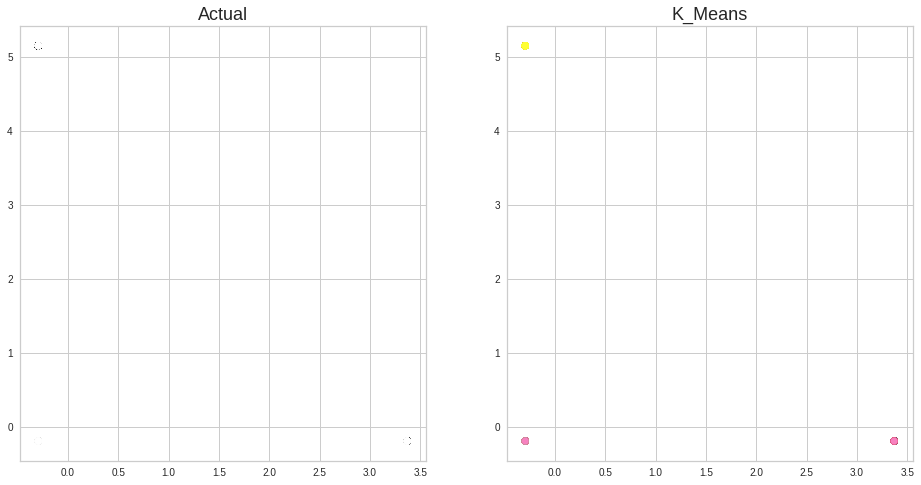

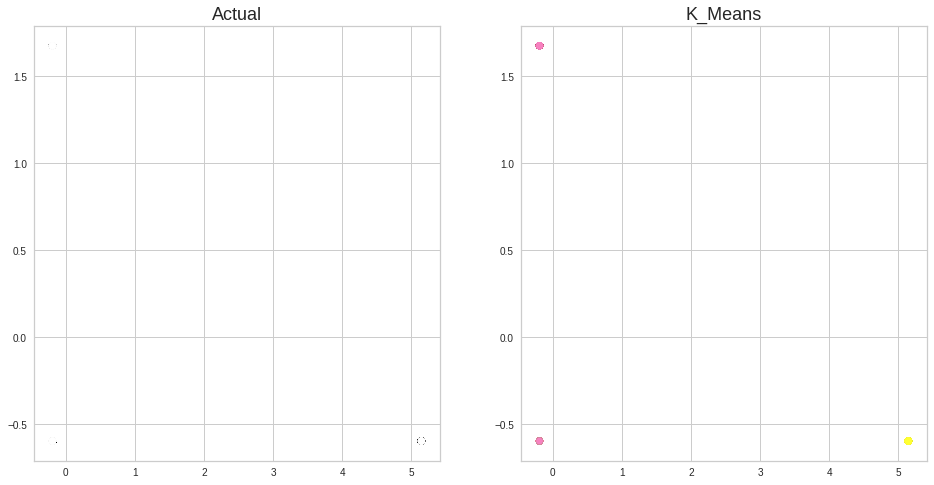

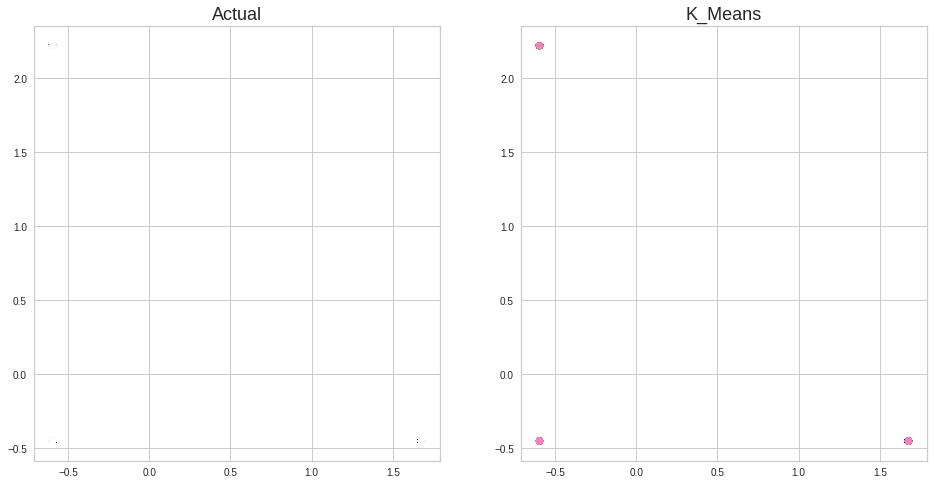

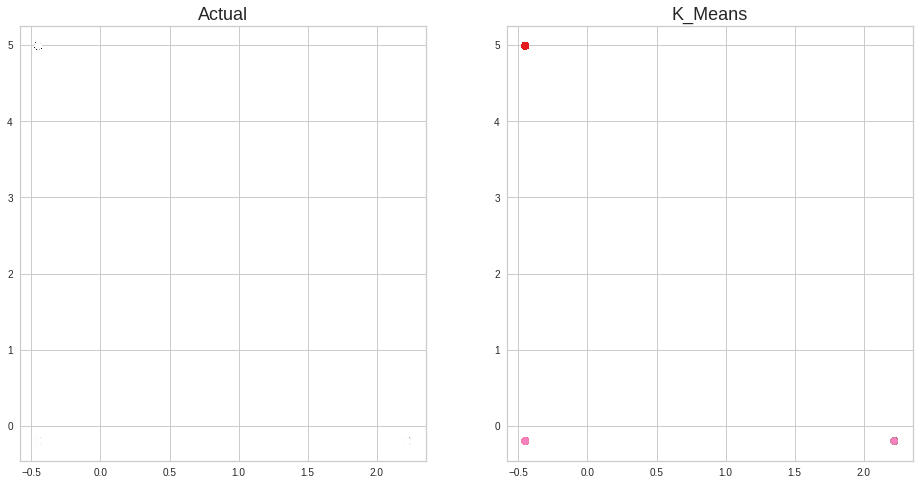

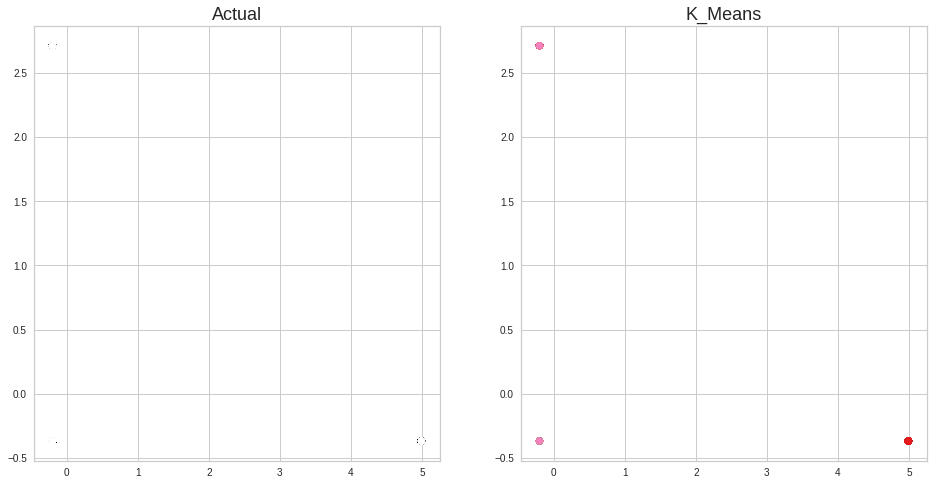

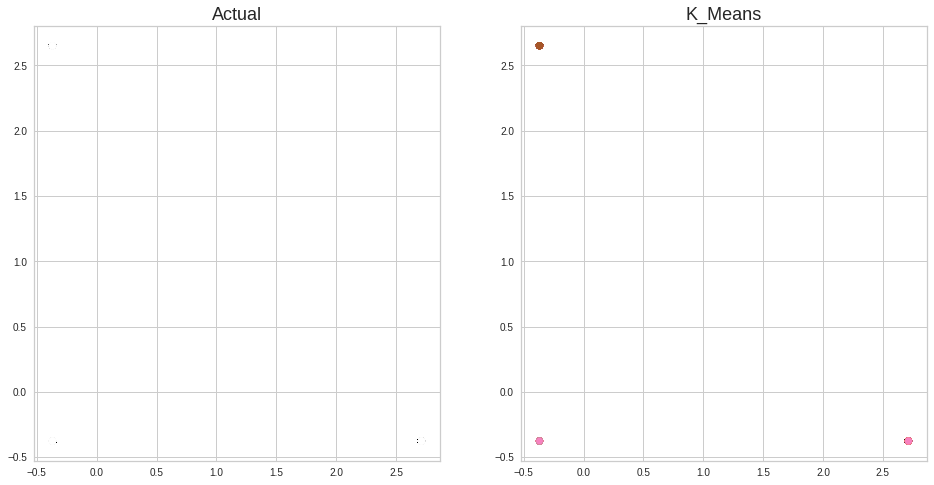

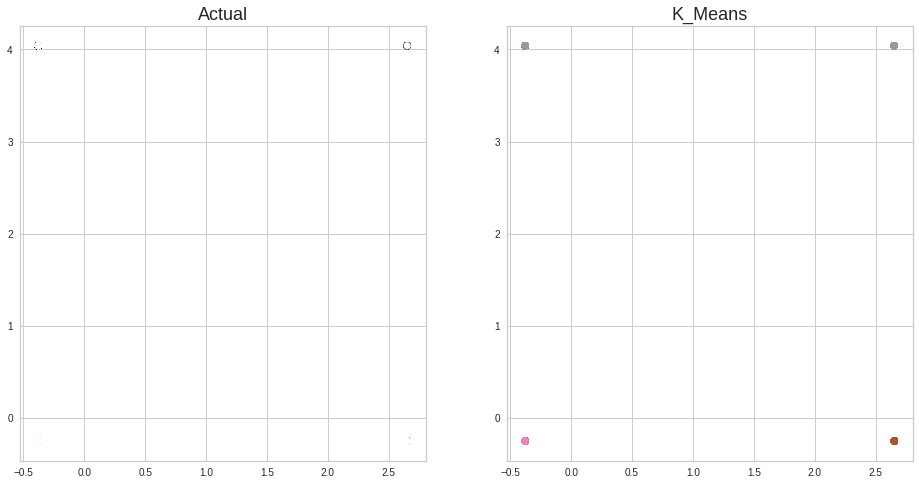

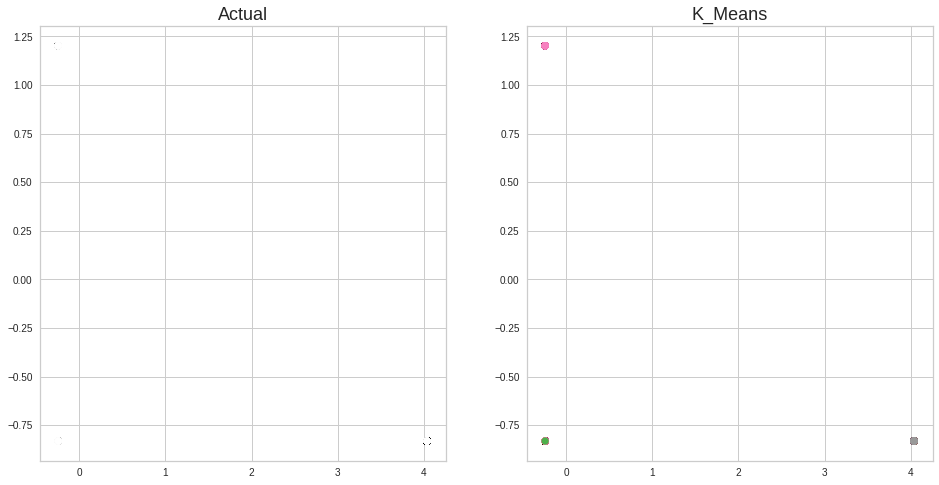

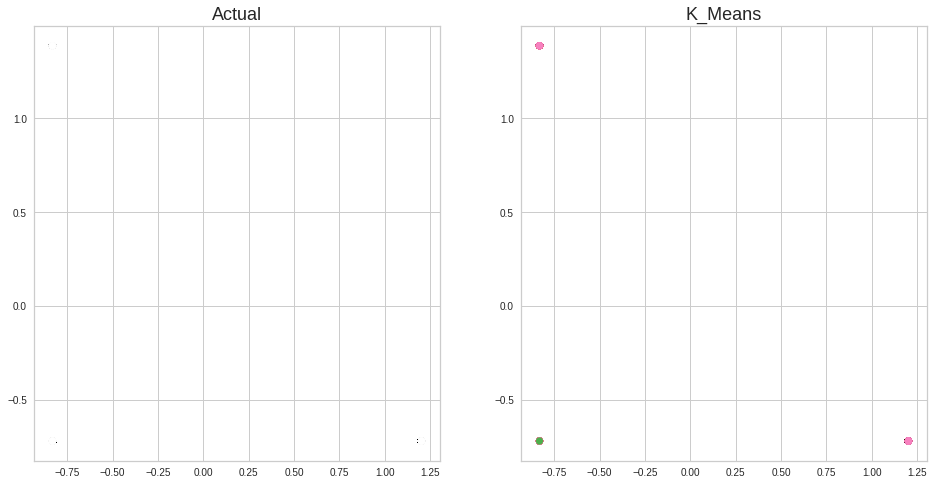

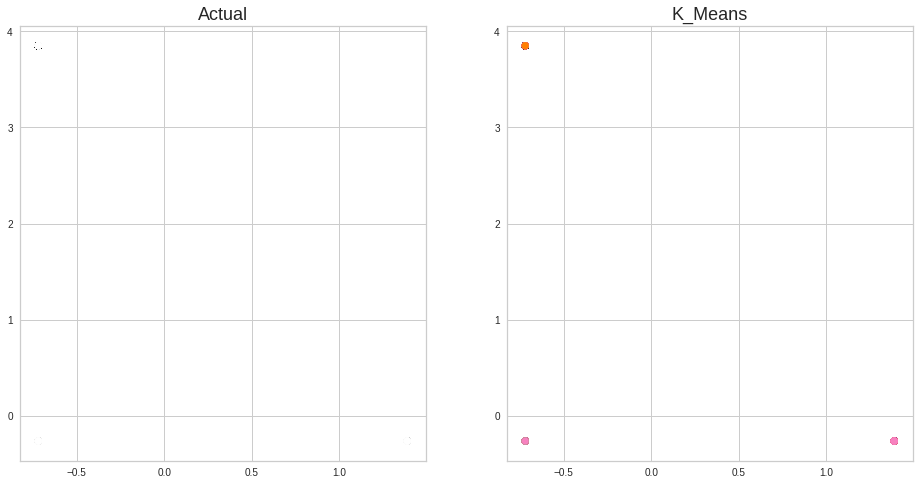

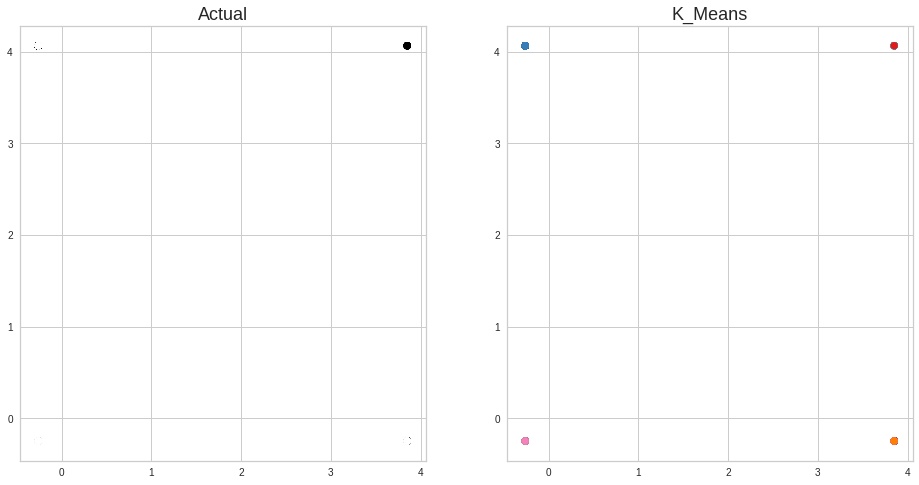

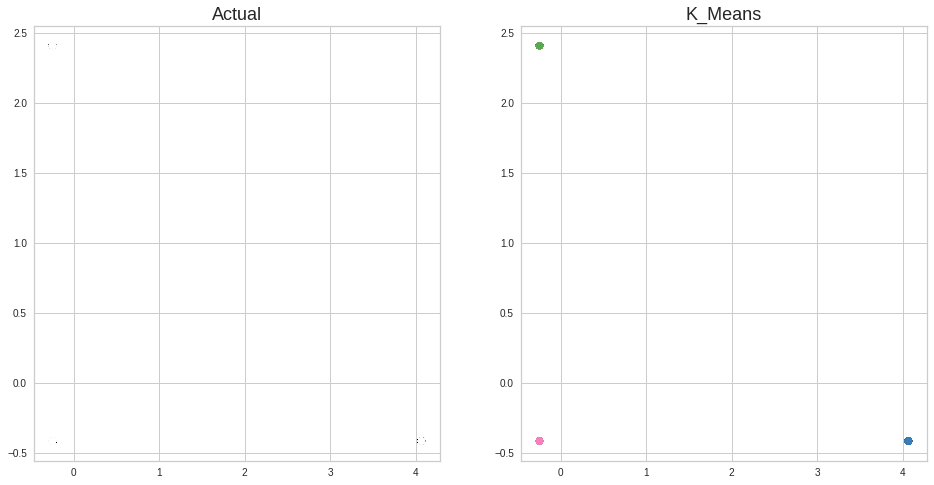

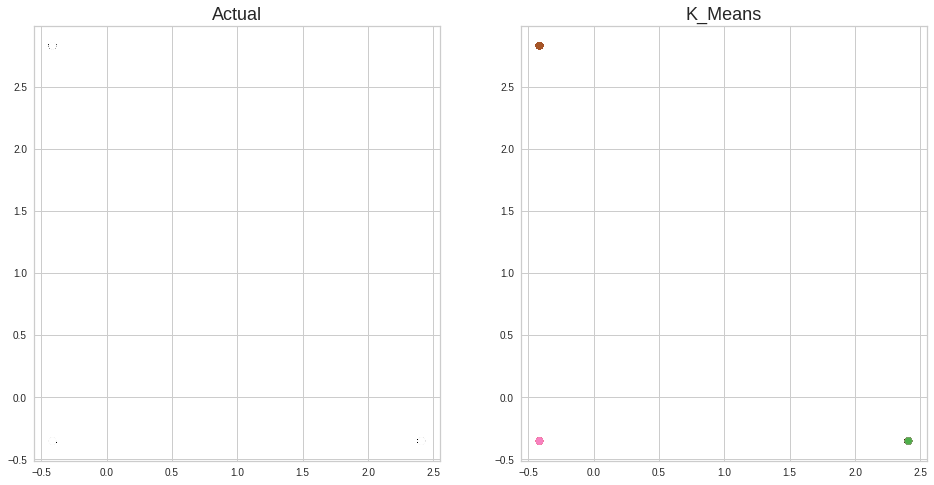

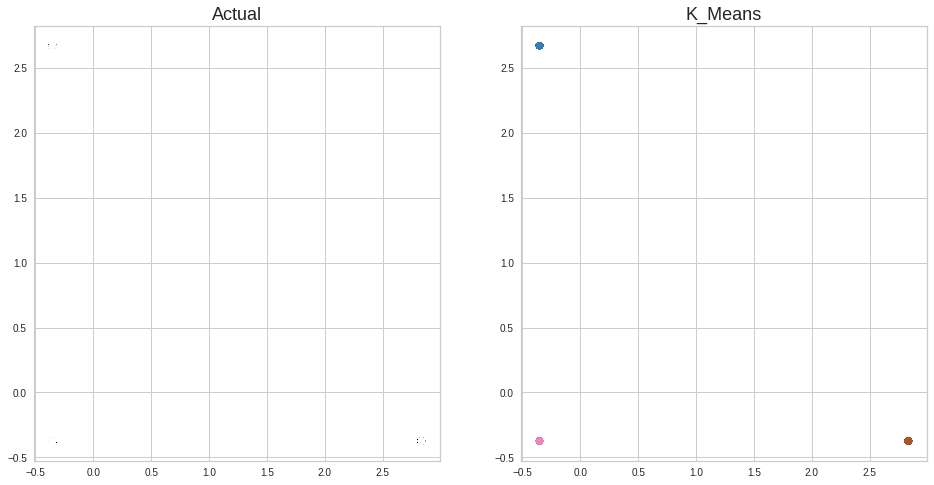

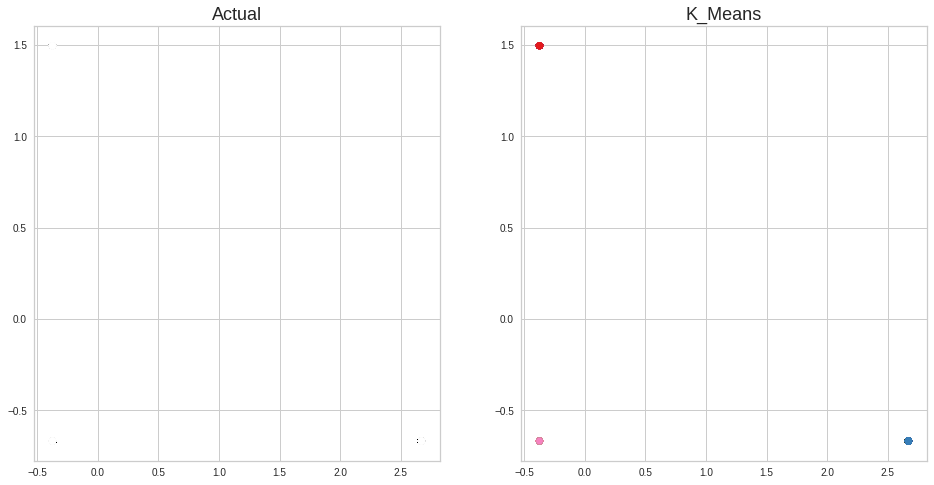

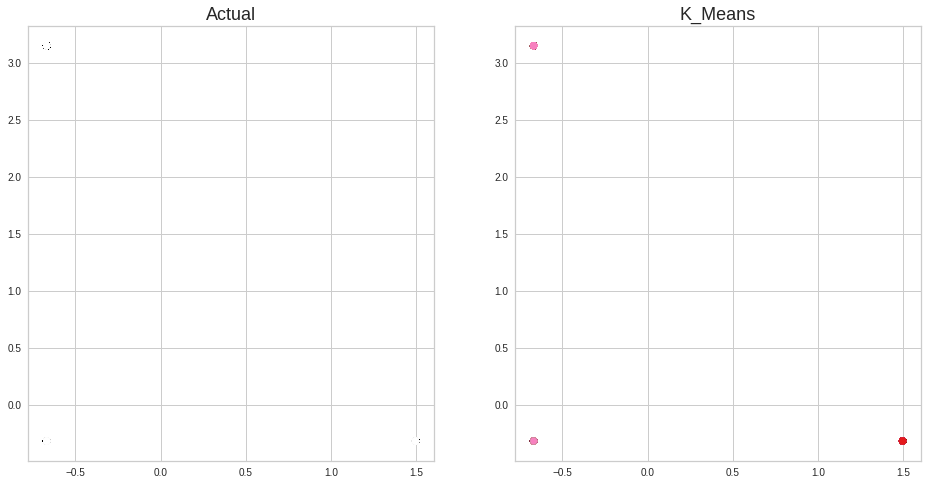

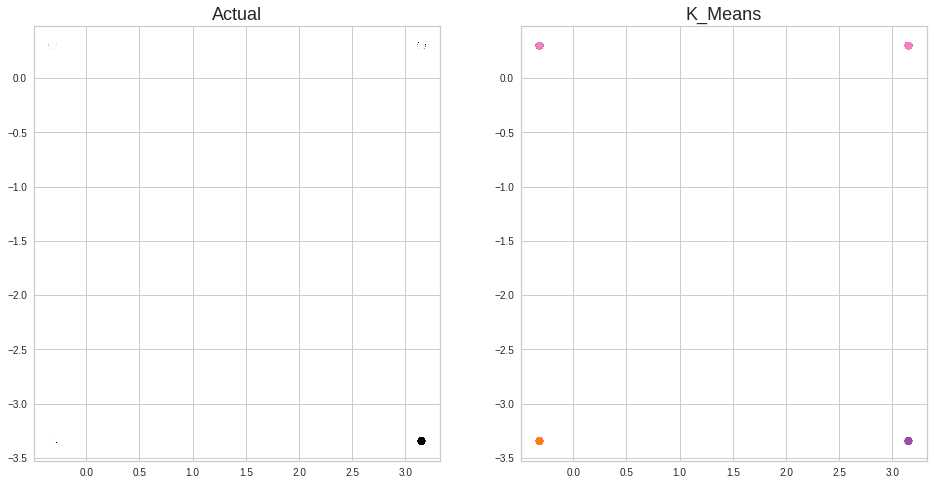

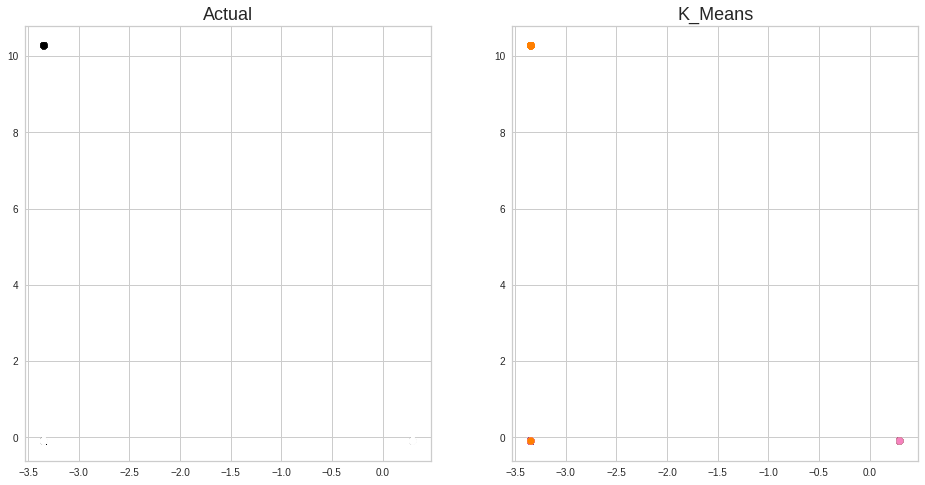

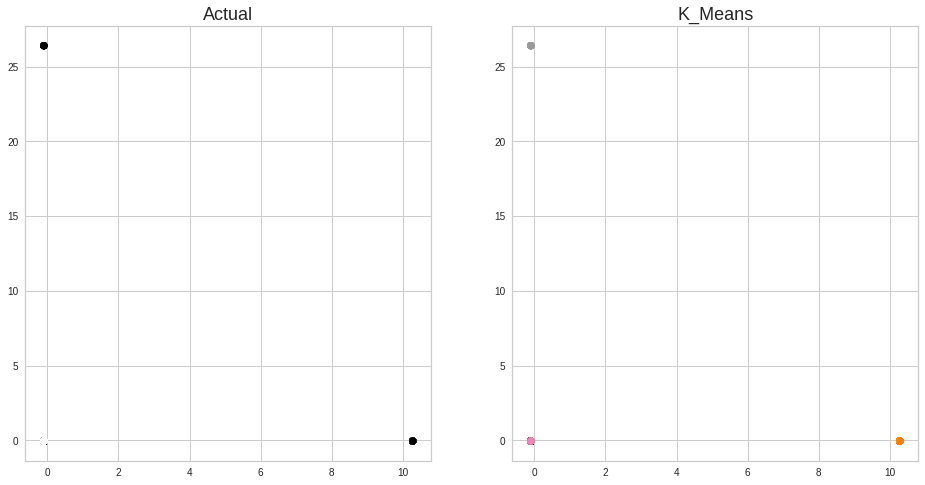

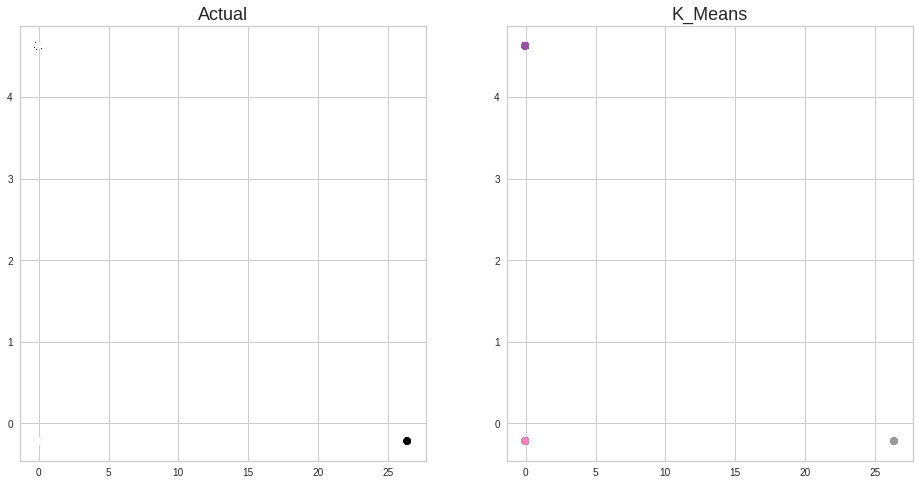

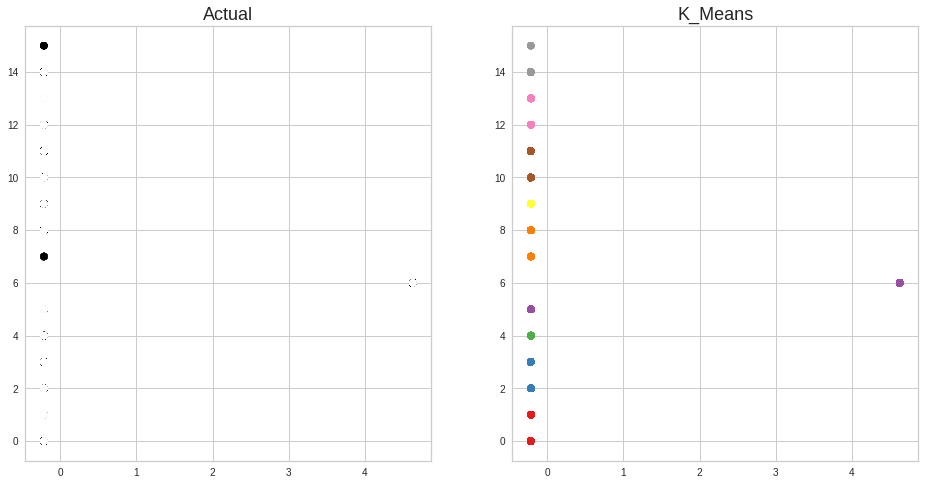

In [147]:
for i in range(1,32):
#     print(i)
    fig, axes = plt.subplots(1, 2, figsize=(16,8))
    axes[0].scatter(df.iloc[:,i], df.iloc[:,i+1], c=df['target'])
    axes[1].scatter(df.iloc[:,i], df.iloc[:,i+1], c=df['k_means'], cmap=plt.cm.Set1)
    axes[0].set_title('Actual', fontsize=18)
    axes[1].set_title('K_Means', fontsize=18)

Text(0.5, 1.0, 'K_Means')

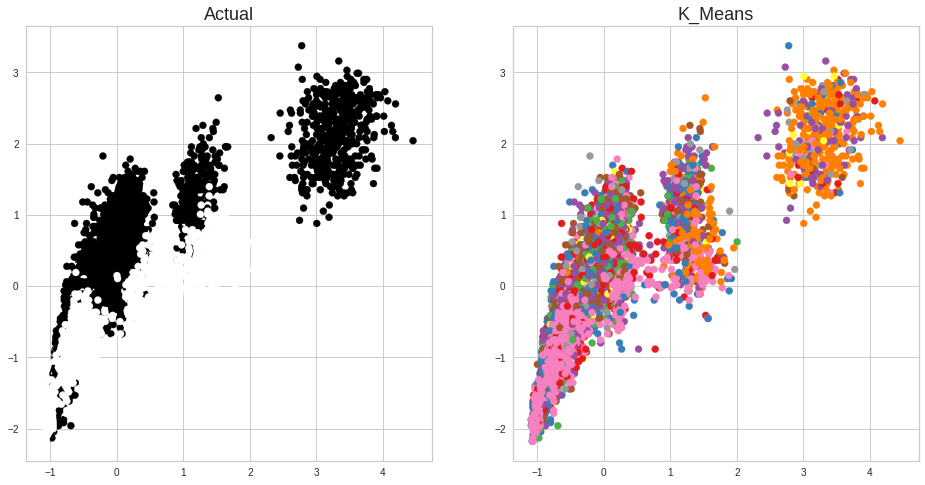

In [117]:

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df['5'], df['6'], c=df['target'])
axes[1].scatter(df['5'], df['6'], c=df['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

/home/dheekshitha-vibha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


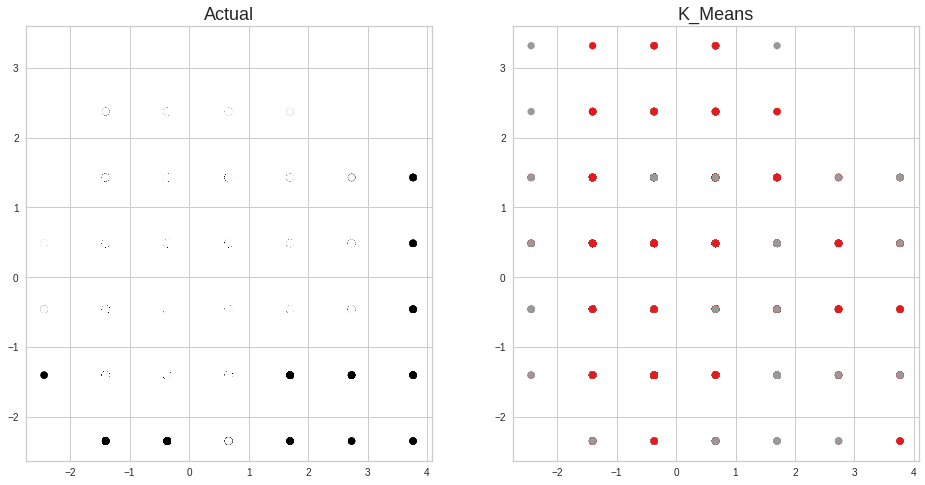

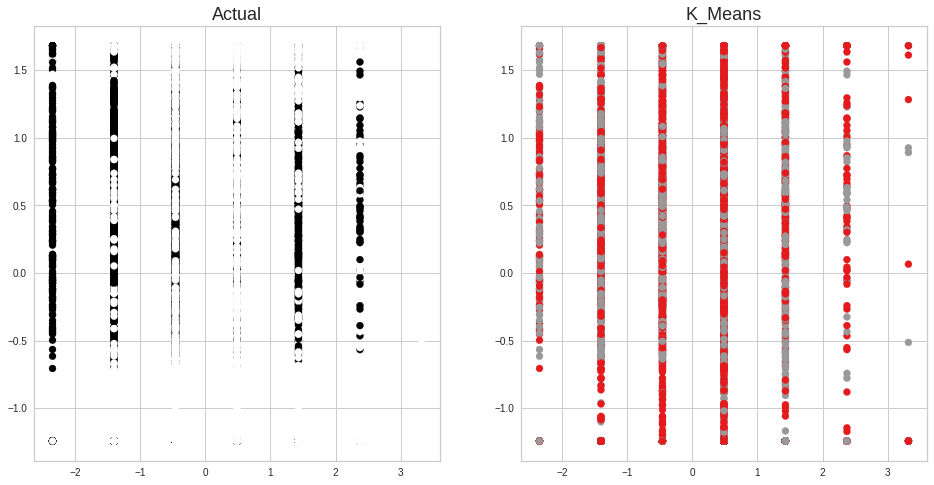

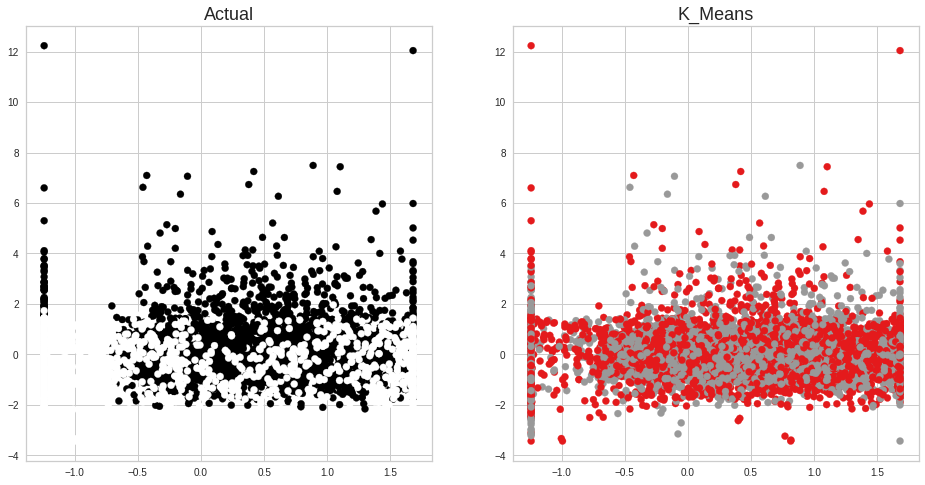

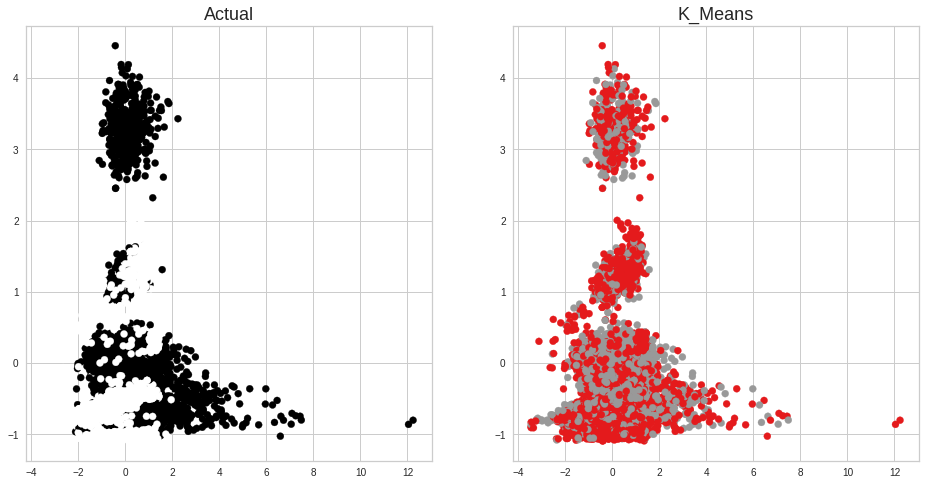

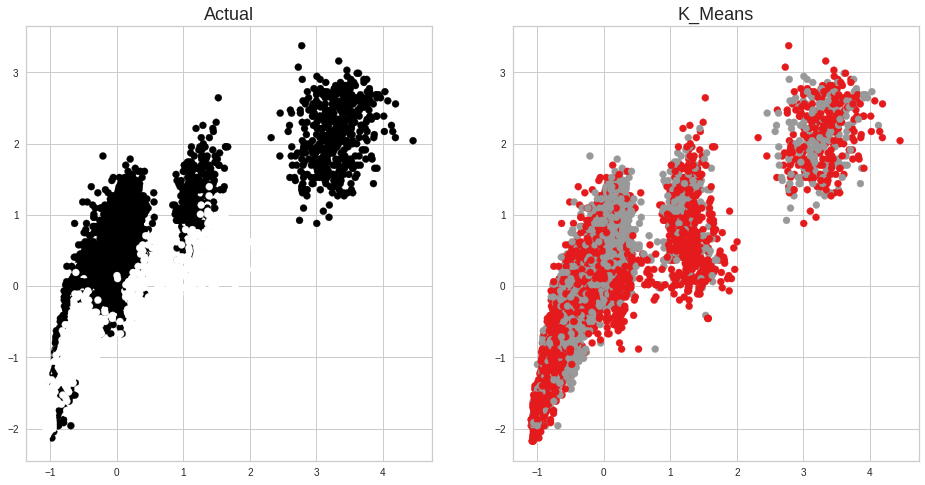

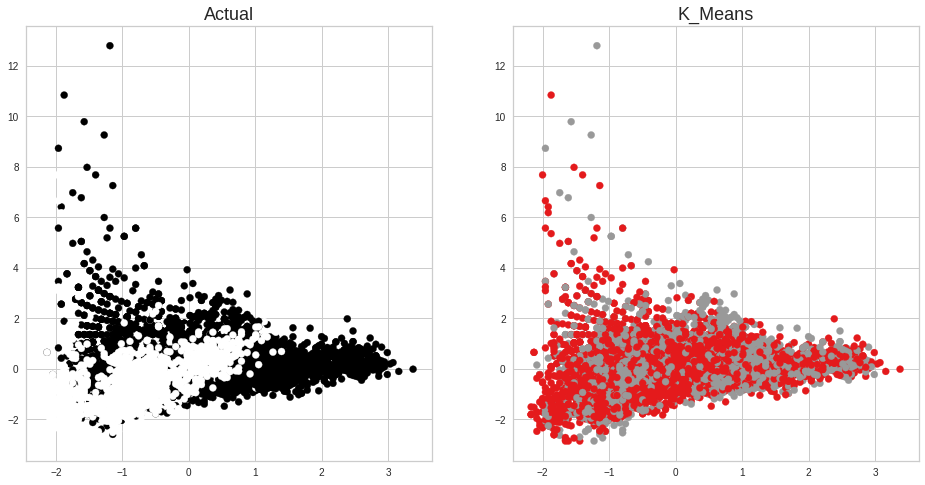

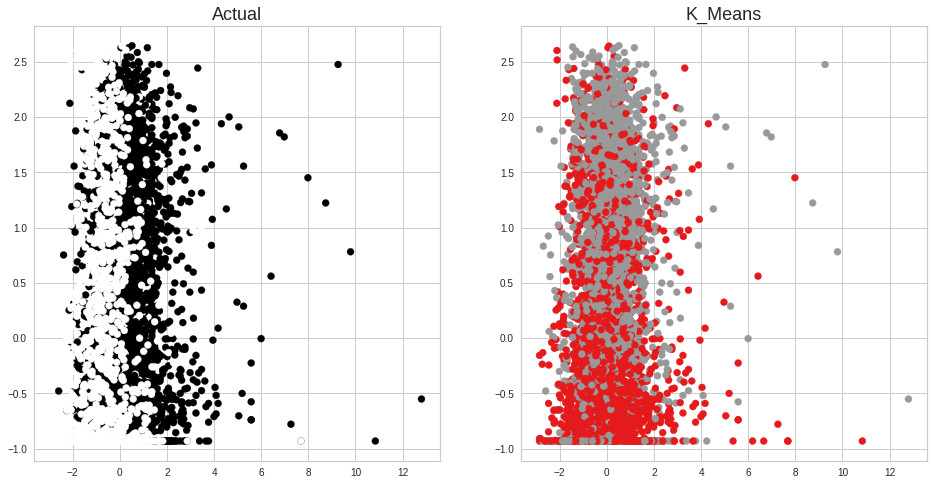

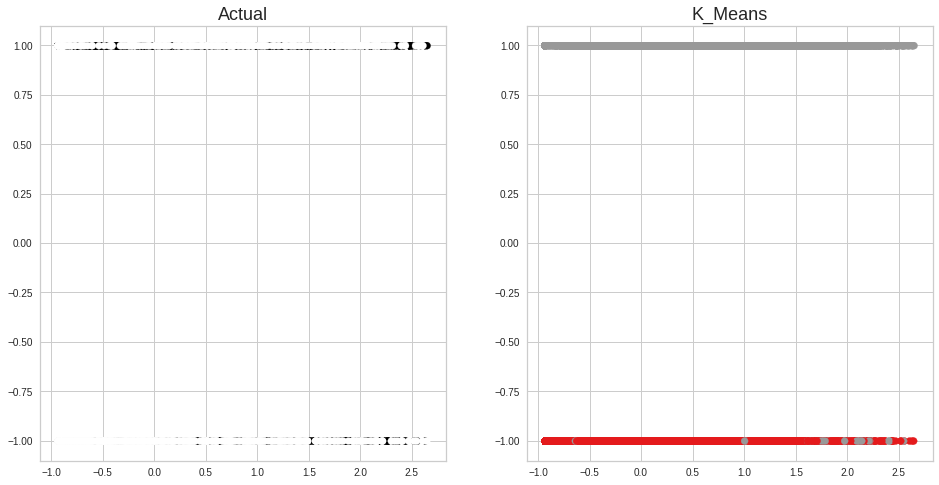

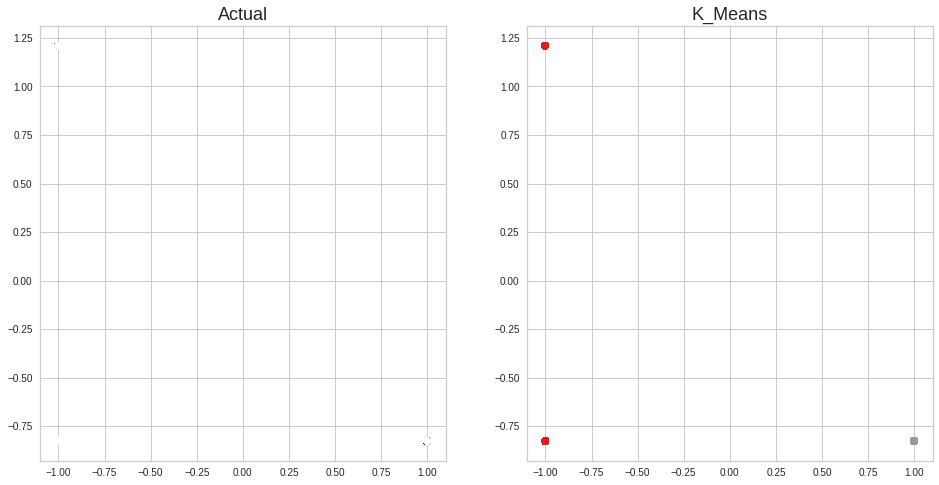

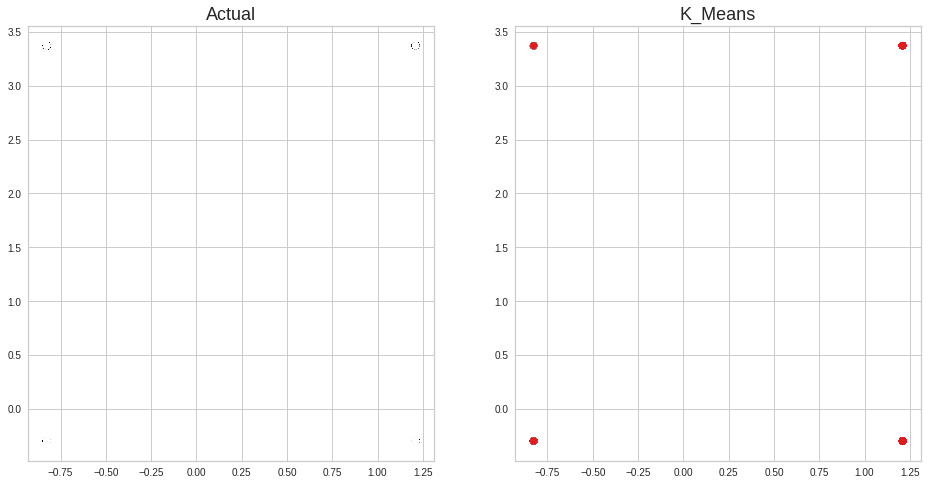

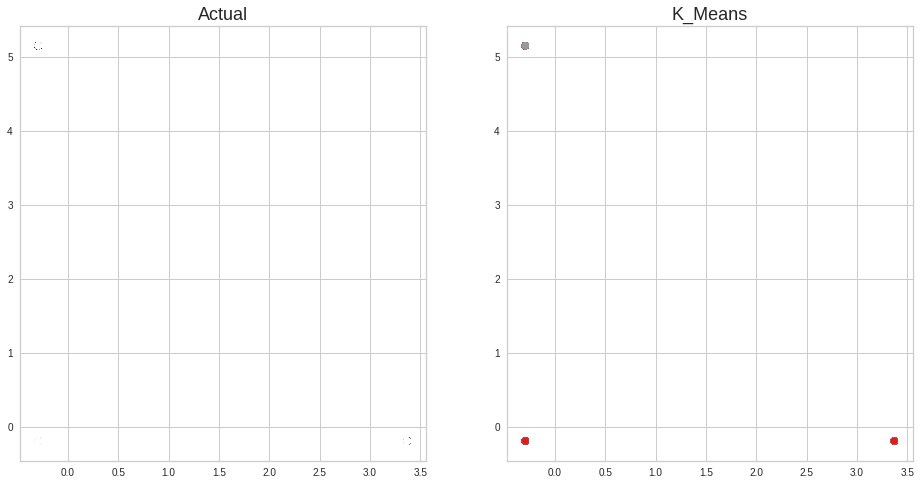

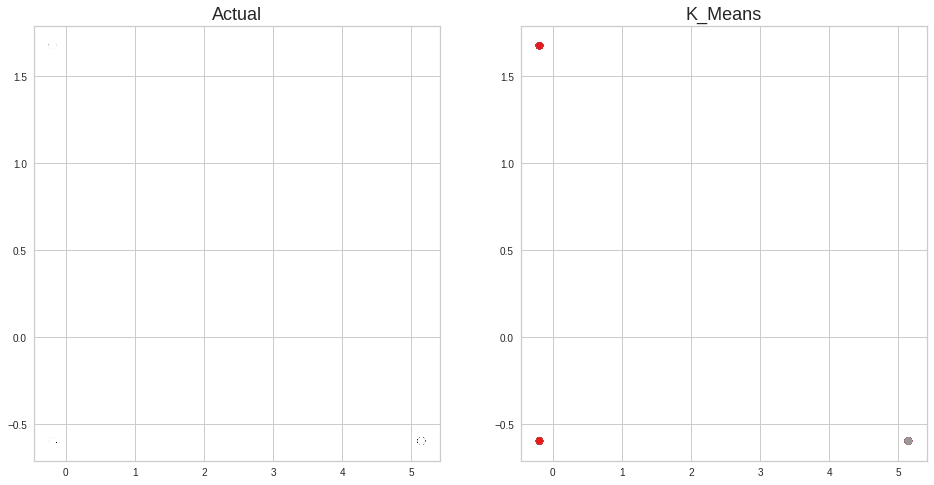

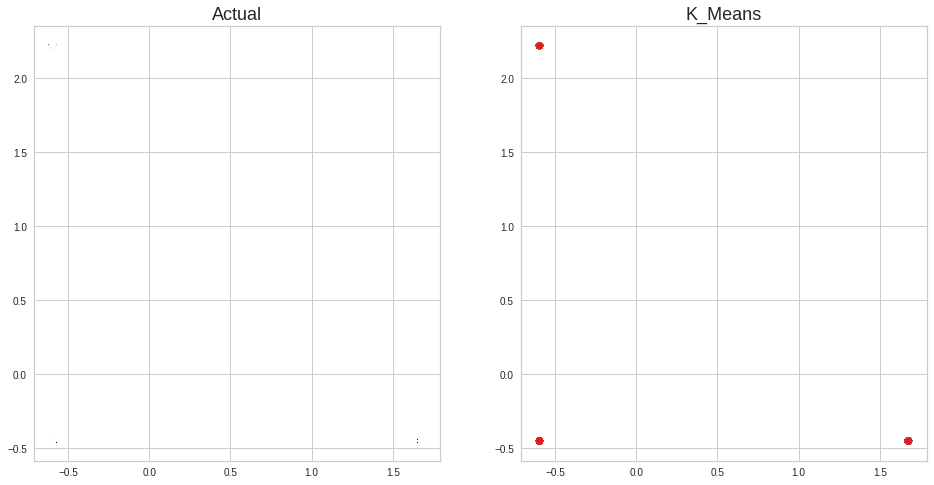

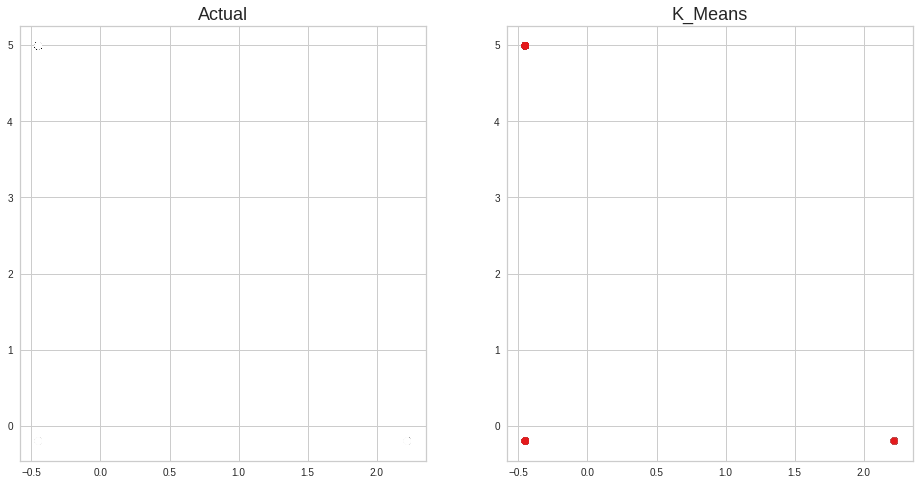

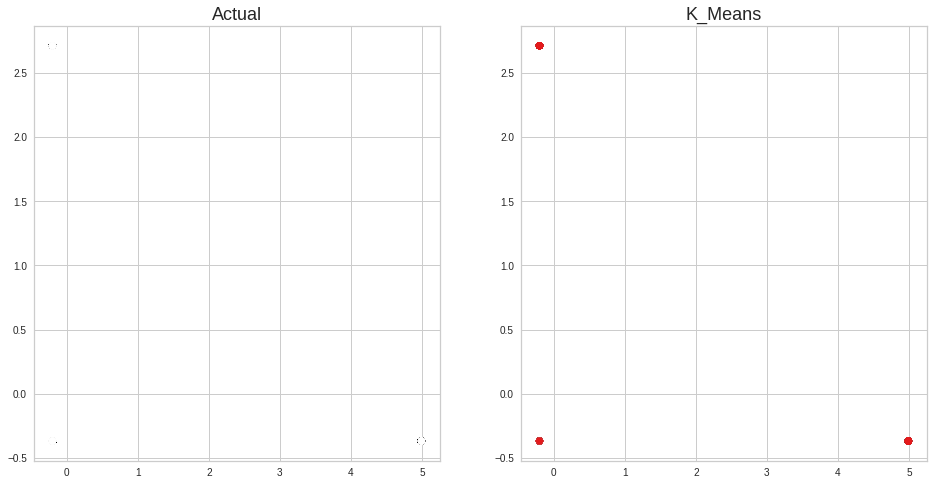

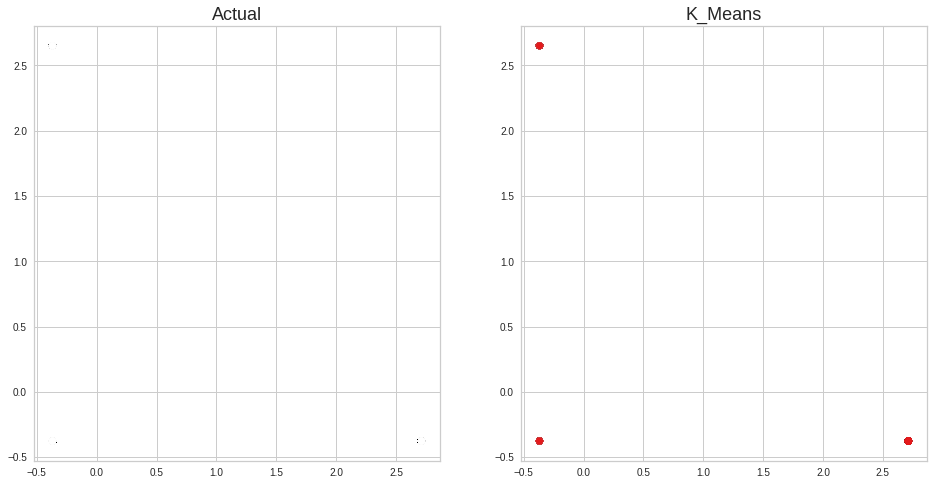

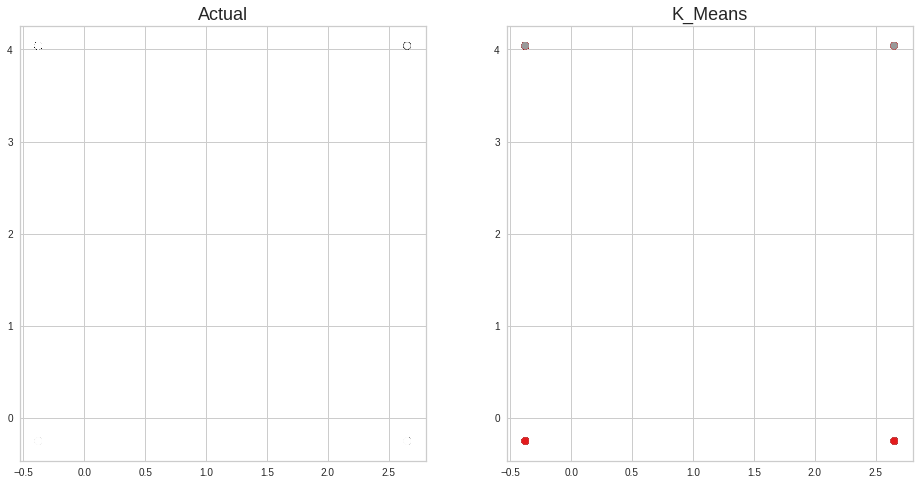

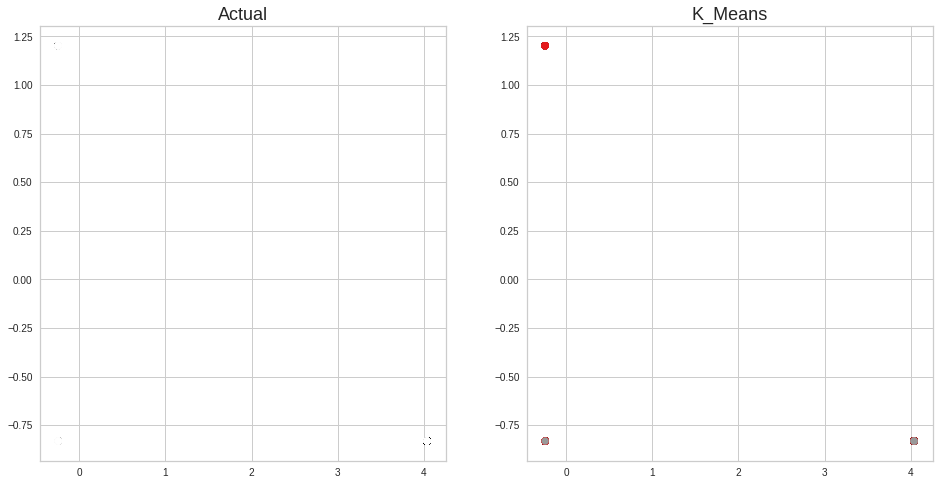

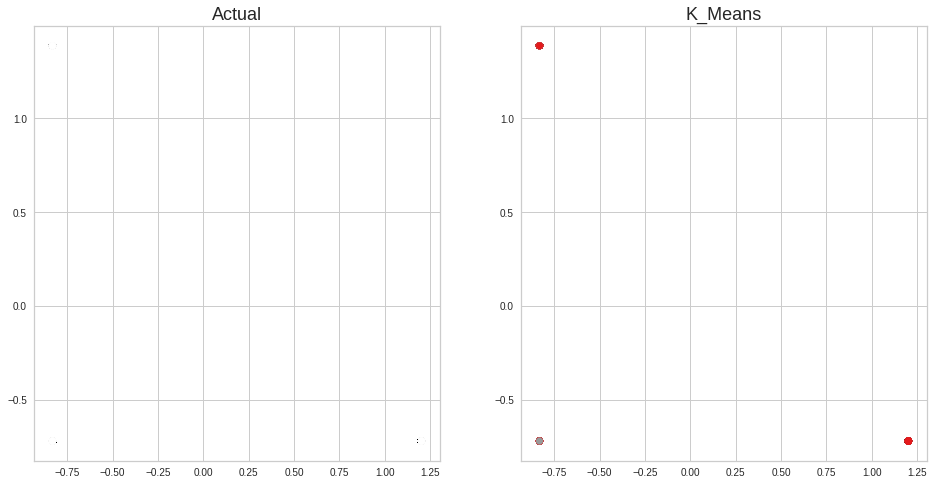

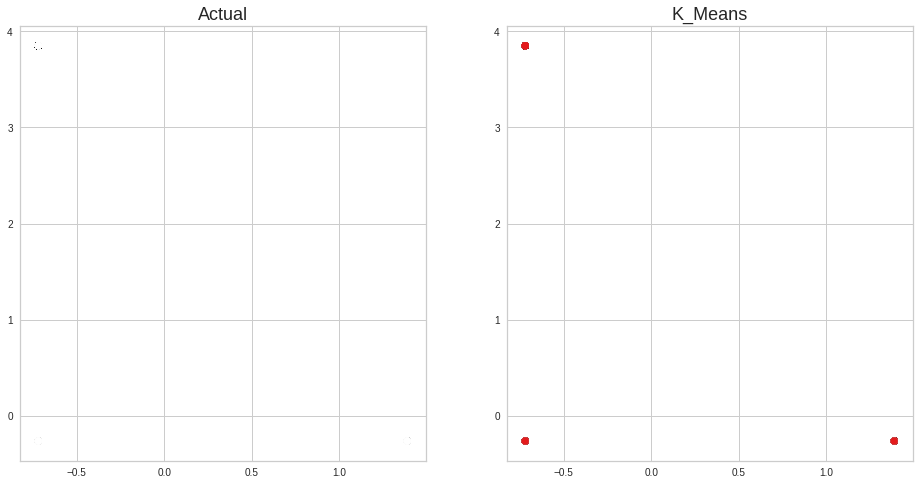

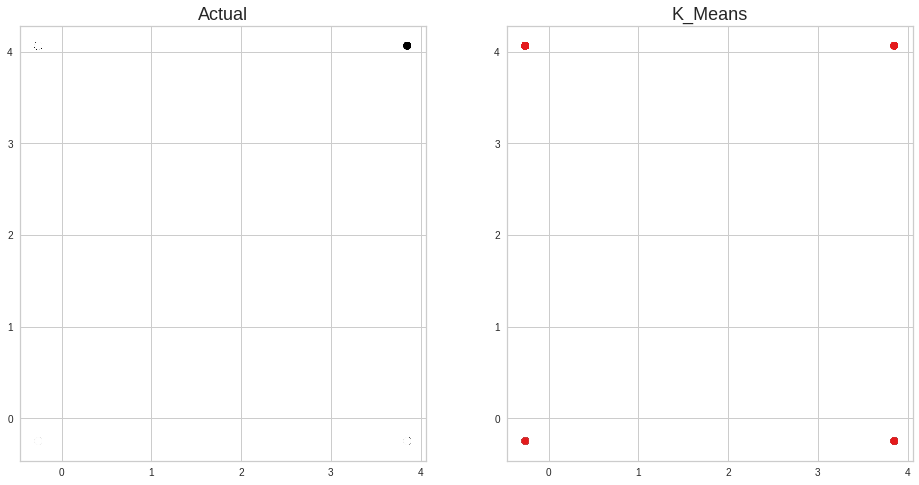

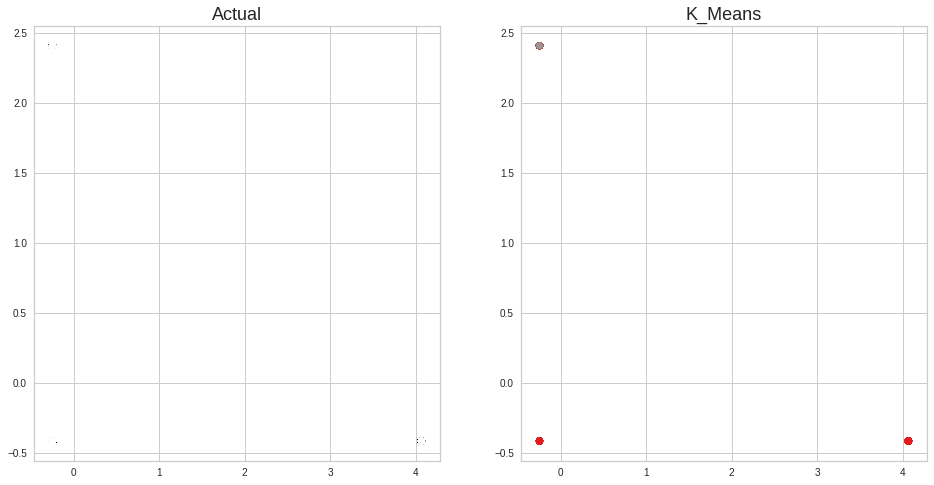

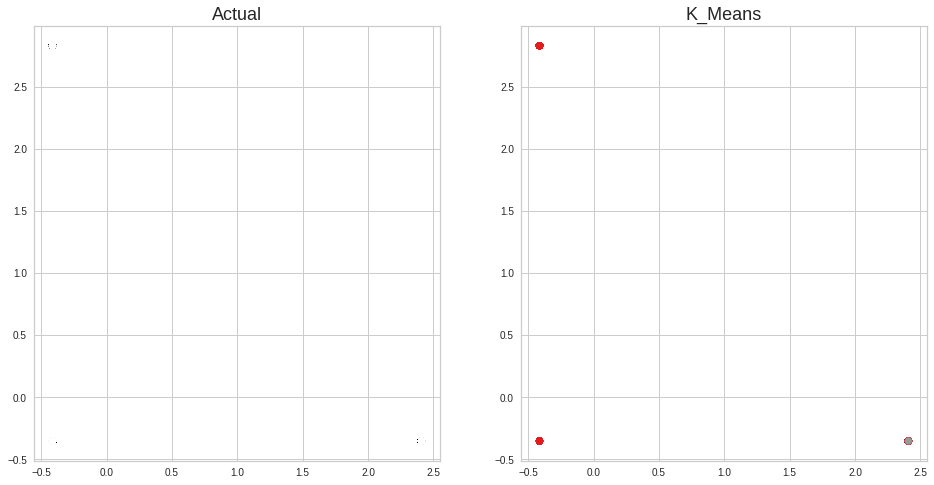

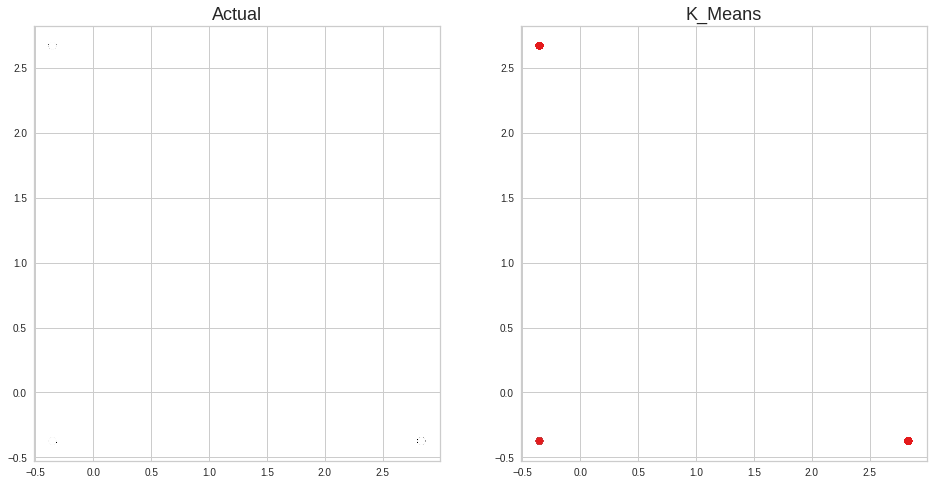

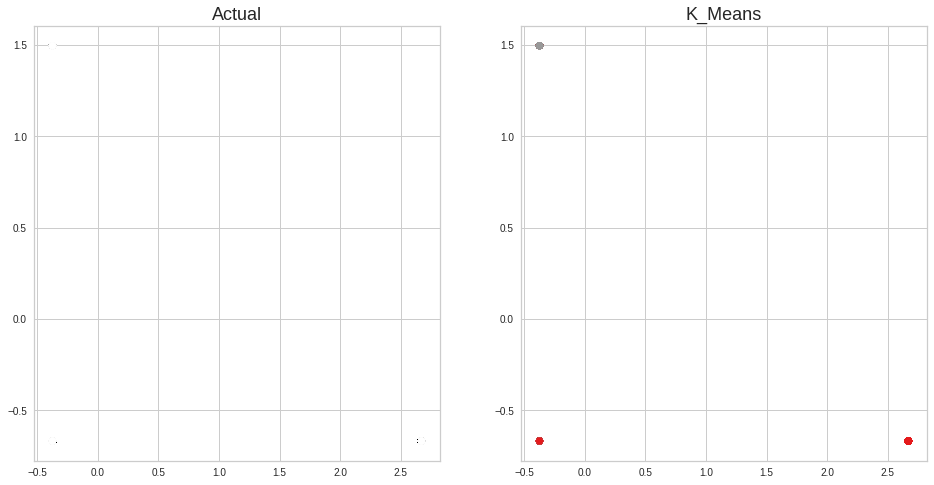

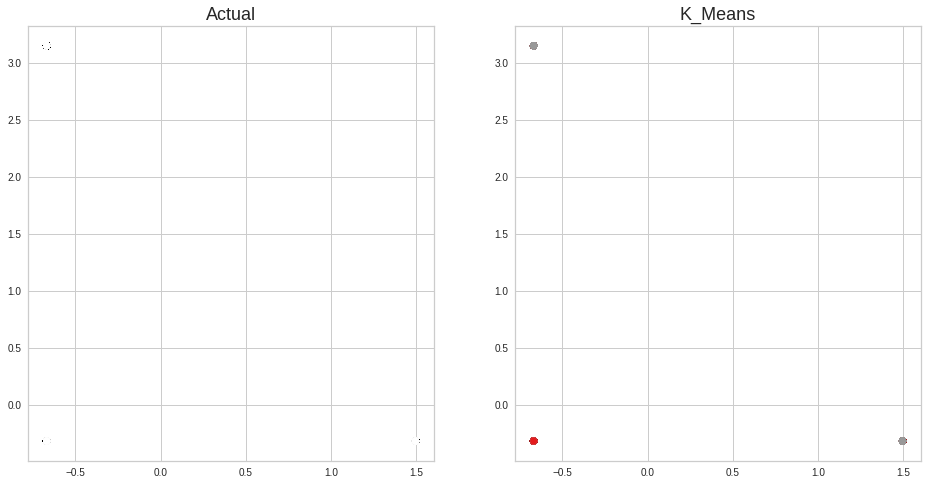

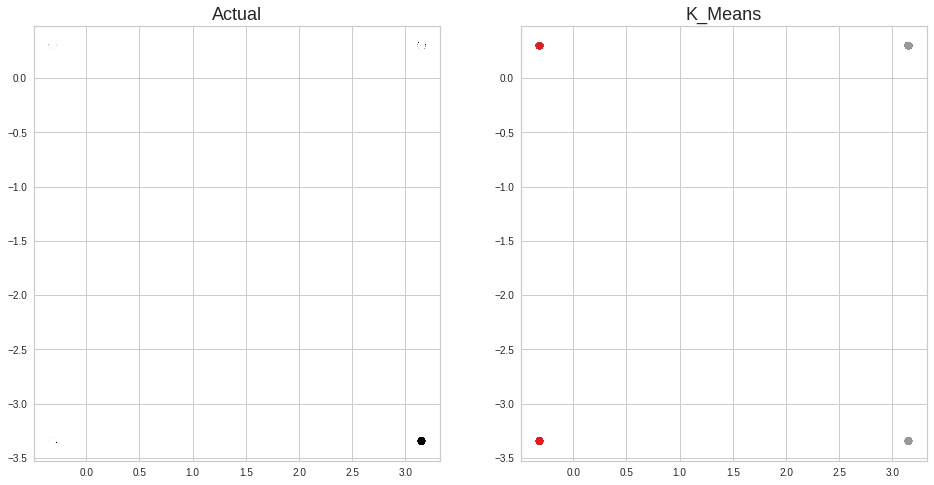

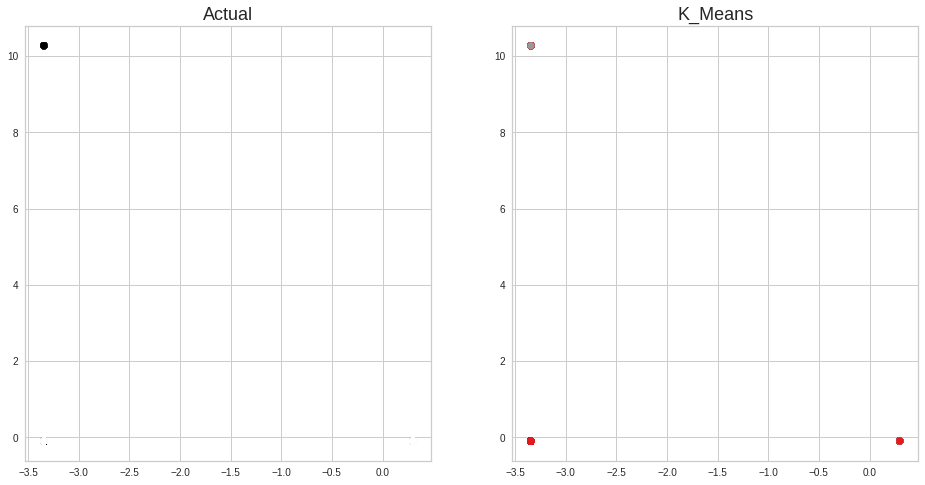

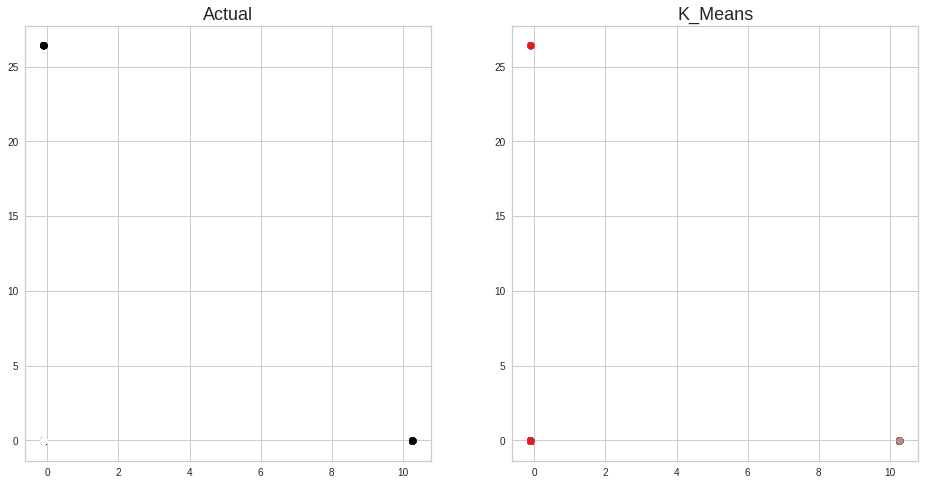

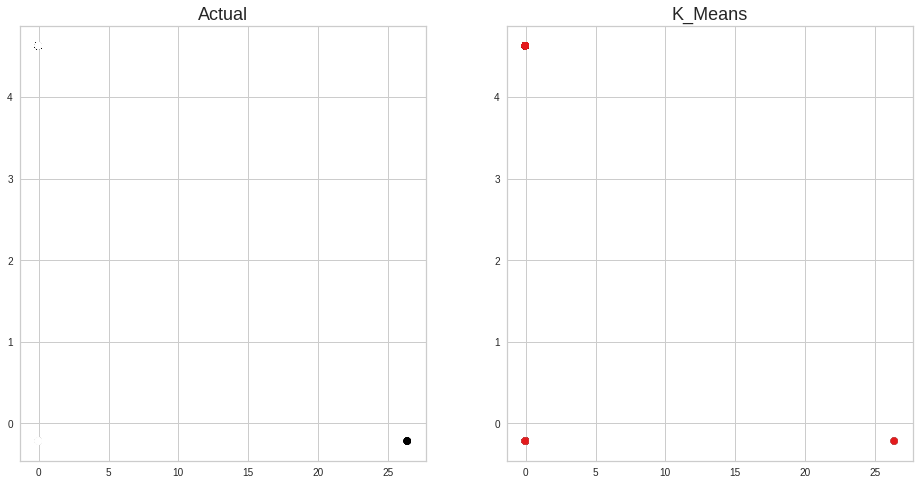

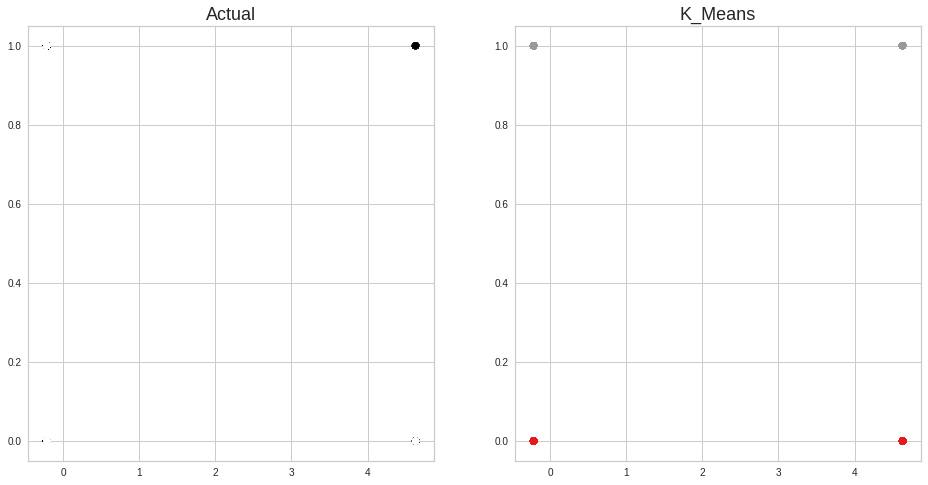

In [150]:
kmeanModel2= KMeans(n_clusters=2, init='k-means++', max_iter=1000, n_init=10, random_state=0)
kmeanModel2.fit(scaled_x_train)
df['k_means']=kmeanModel2.predict(scaled_x_train)
df['target']=y_train_res

for i in range(1,32):
#     print(i)
    fig, axes = plt.subplots(1, 2, figsize=(16,8))
    axes[0].scatter(df.iloc[:,i], df.iloc[:,i+1], c=df['target'])
    axes[1].scatter(df.iloc[:,i], df.iloc[:,i+1], c=df['k_means'], cmap=plt.cm.Set1)
    axes[0].set_title('Actual', fontsize=18)
    axes[1].set_title('K_Means', fontsize=18)

/home/dheekshitha-vibha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


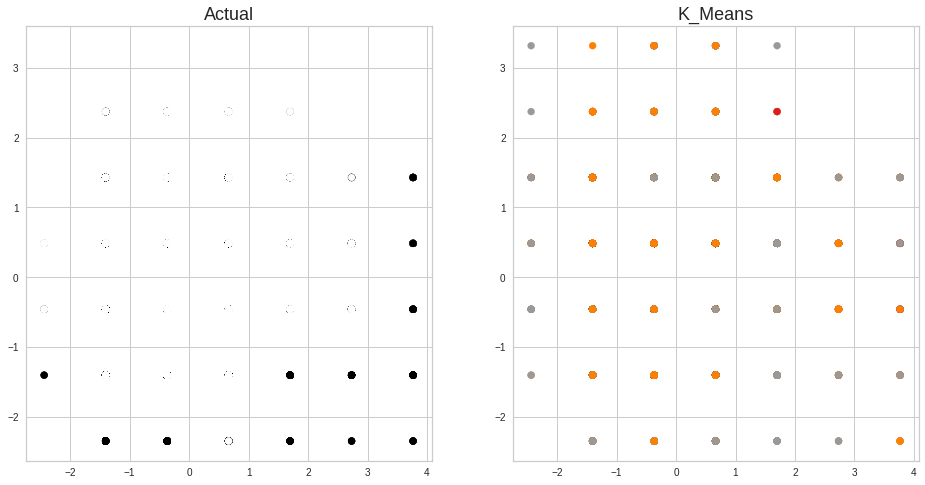

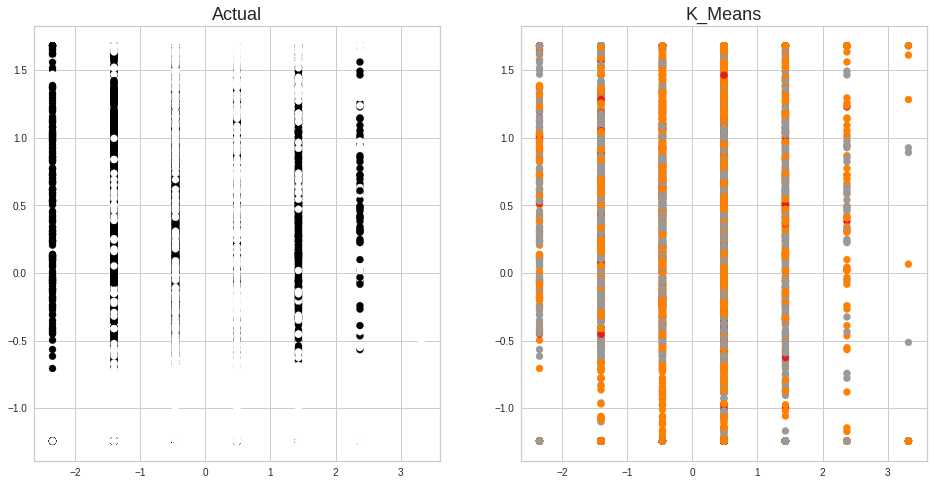

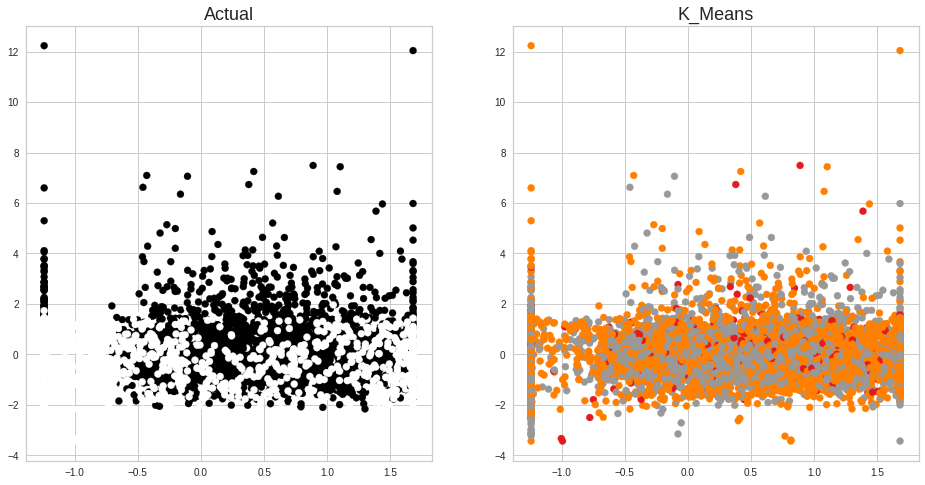

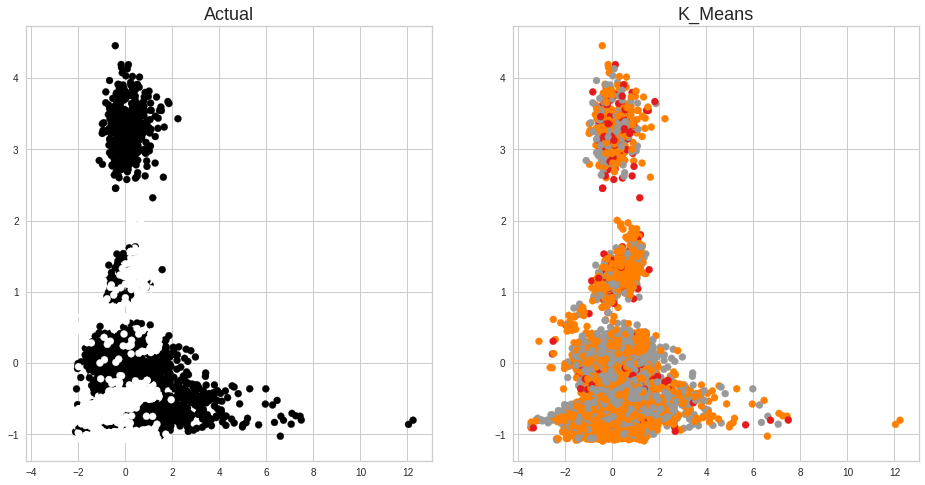

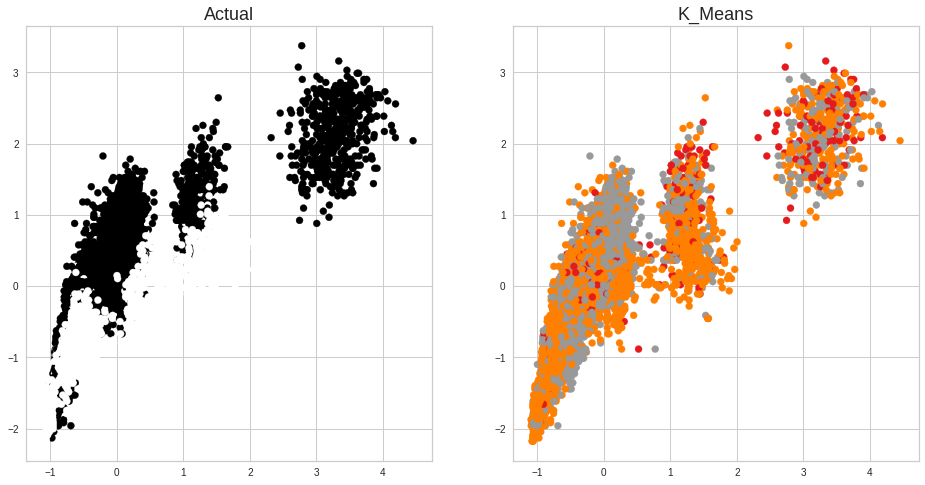

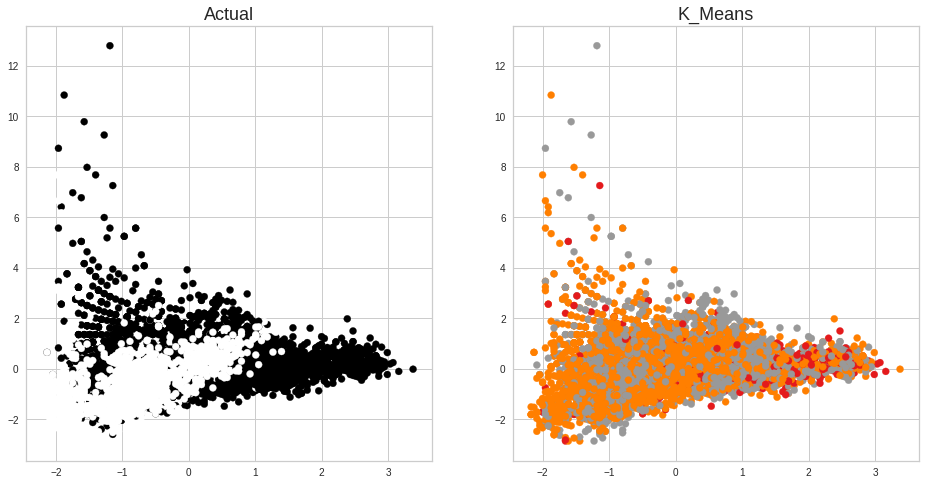

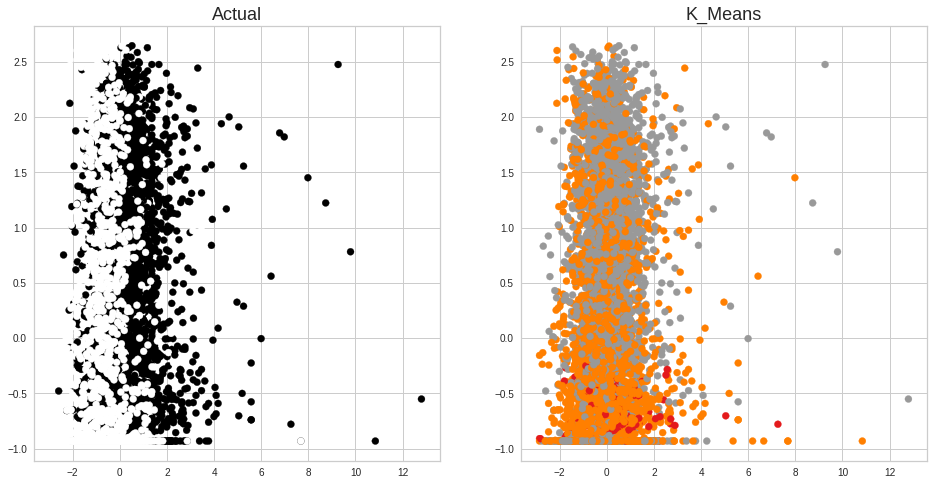

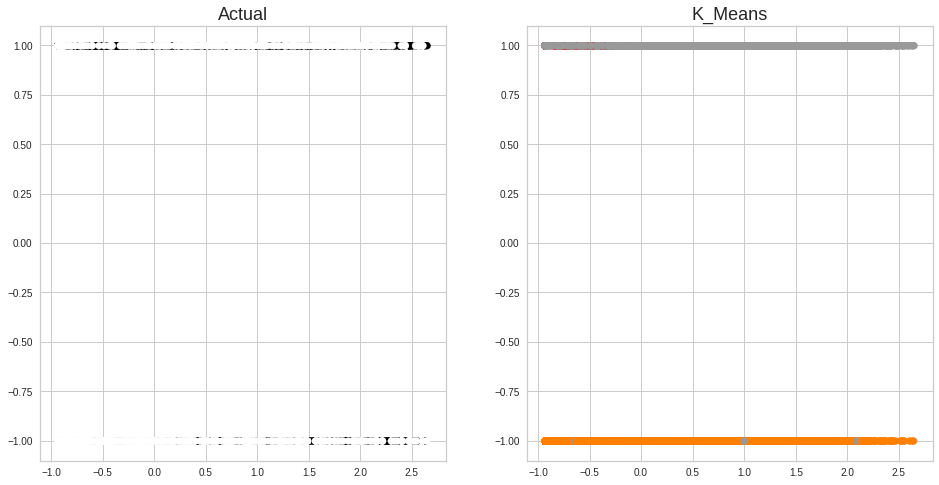

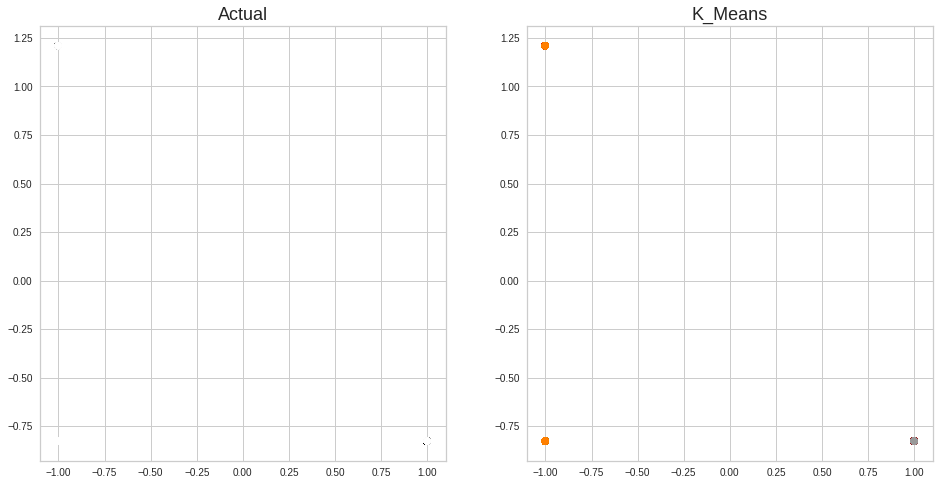

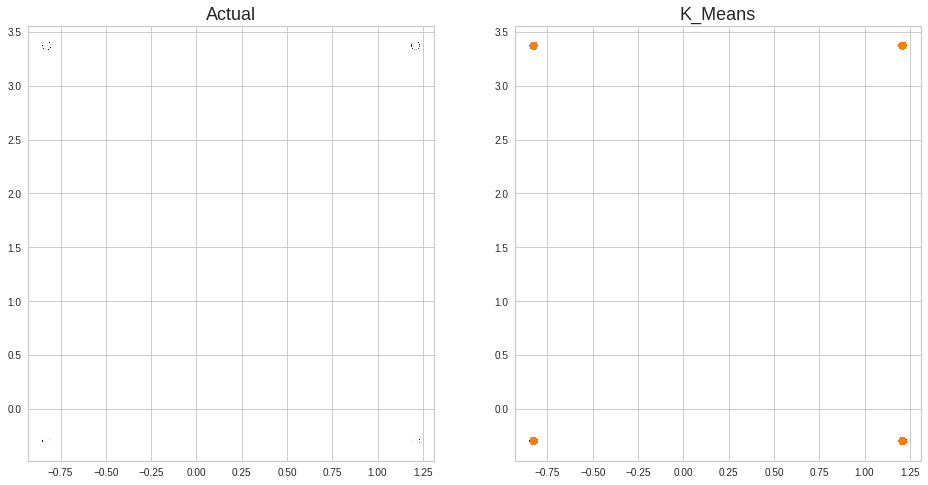

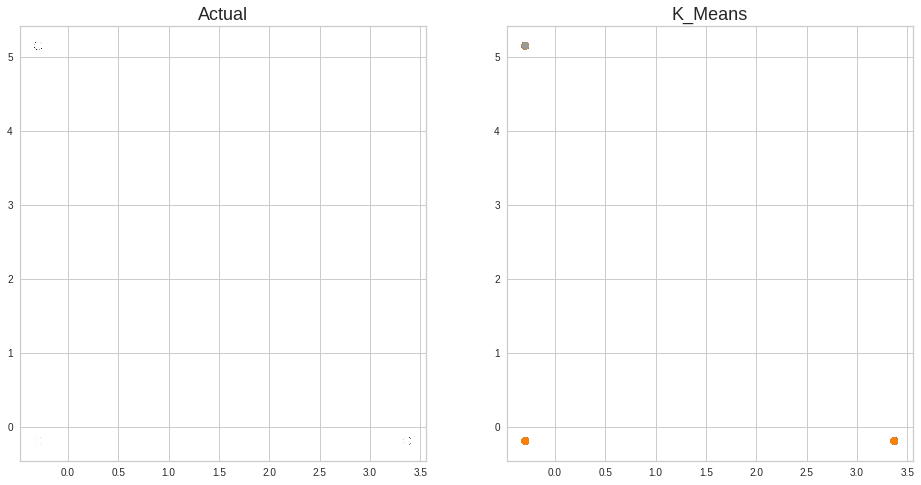

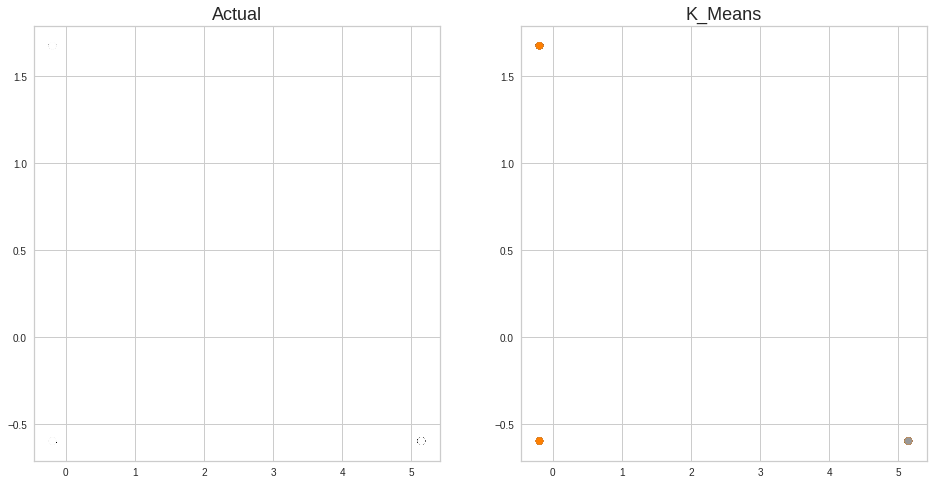

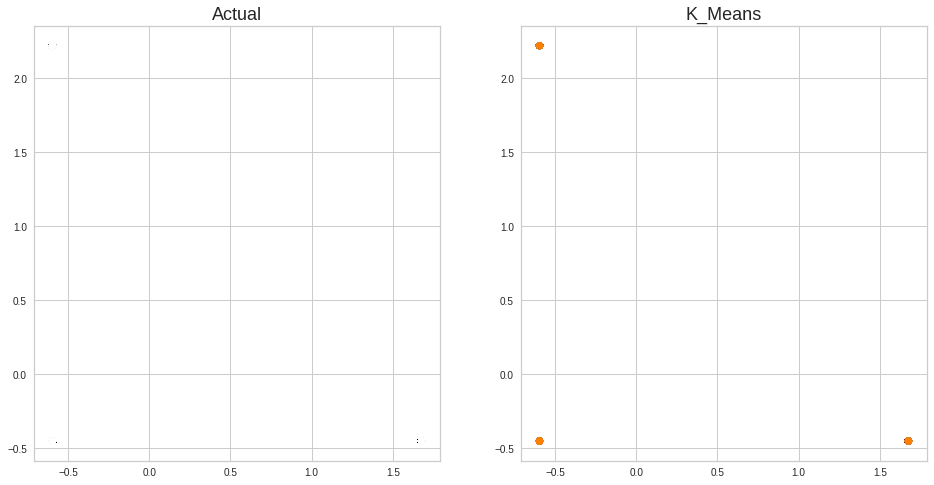

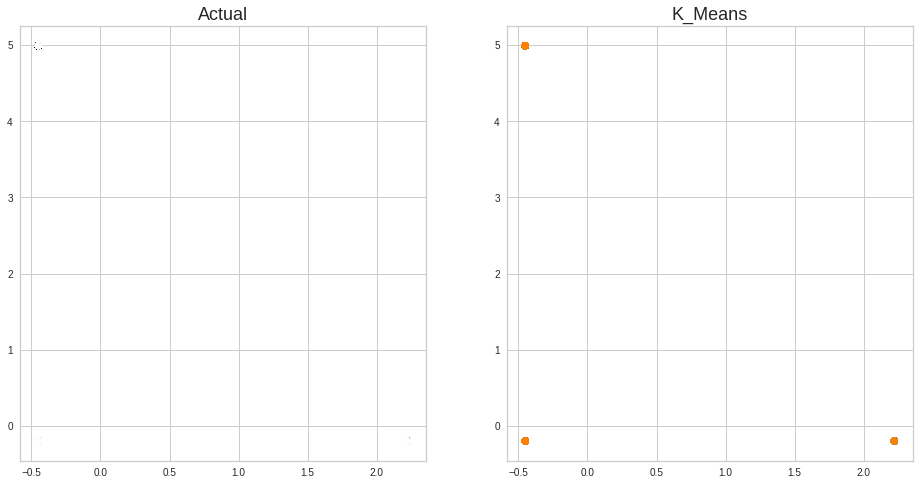

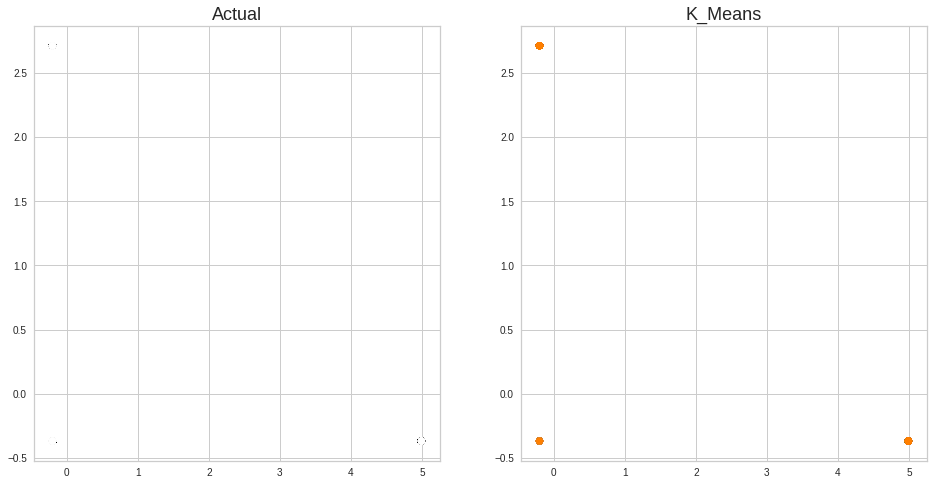

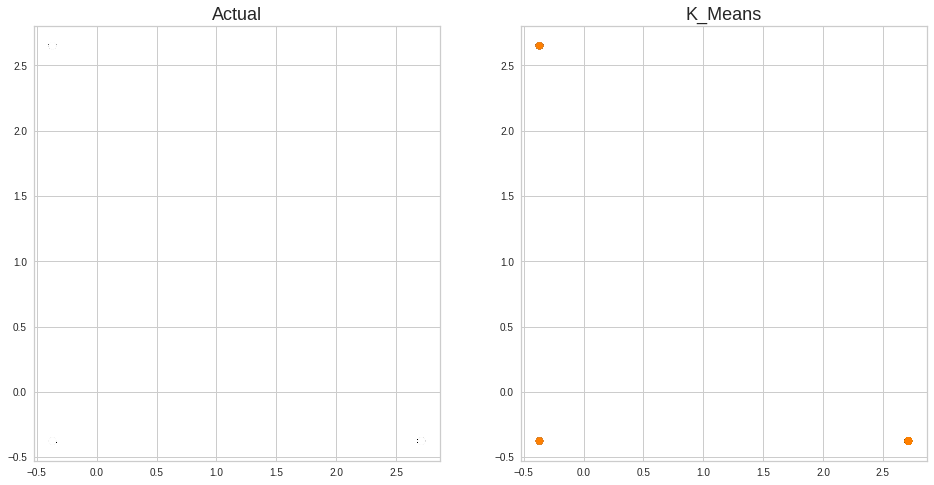

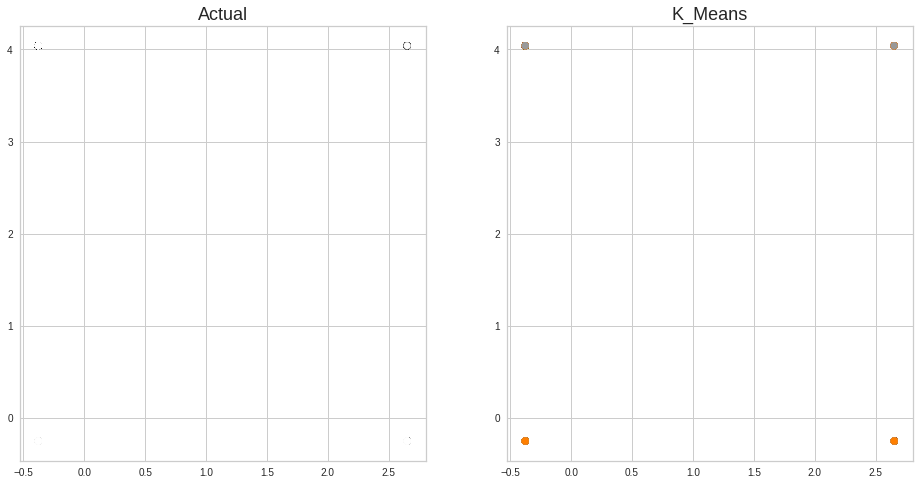

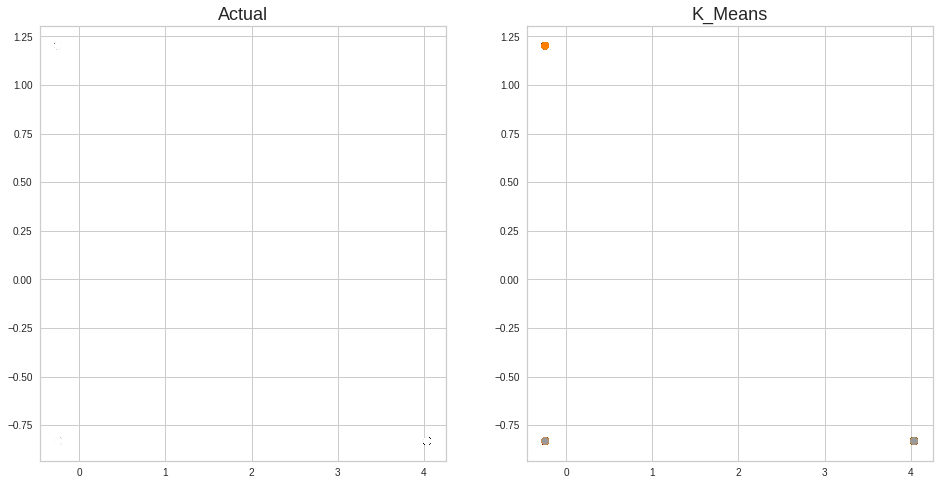

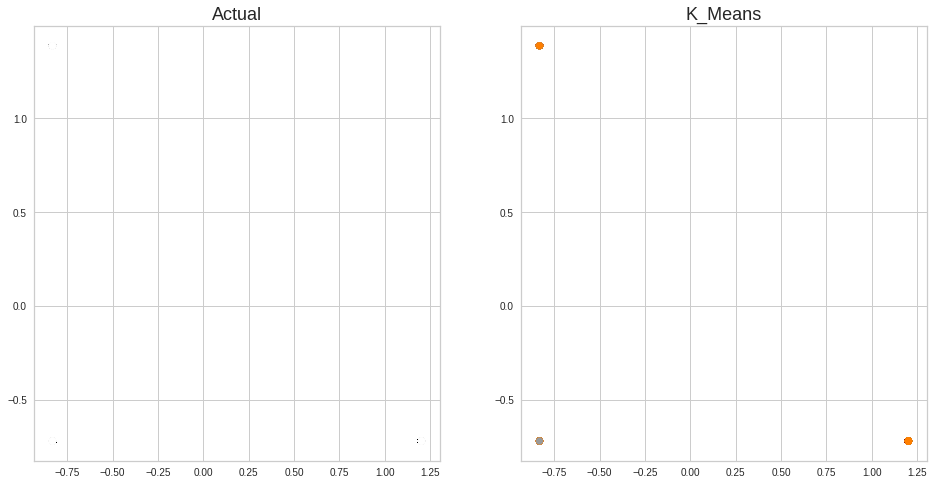

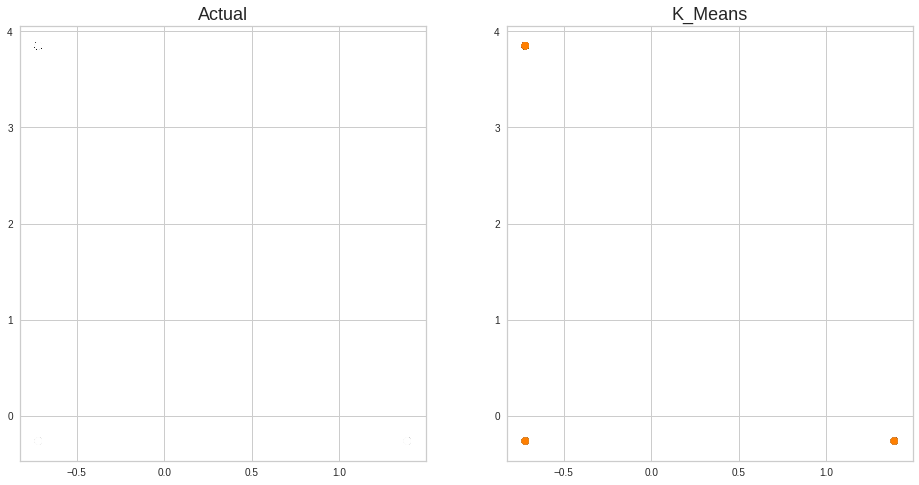

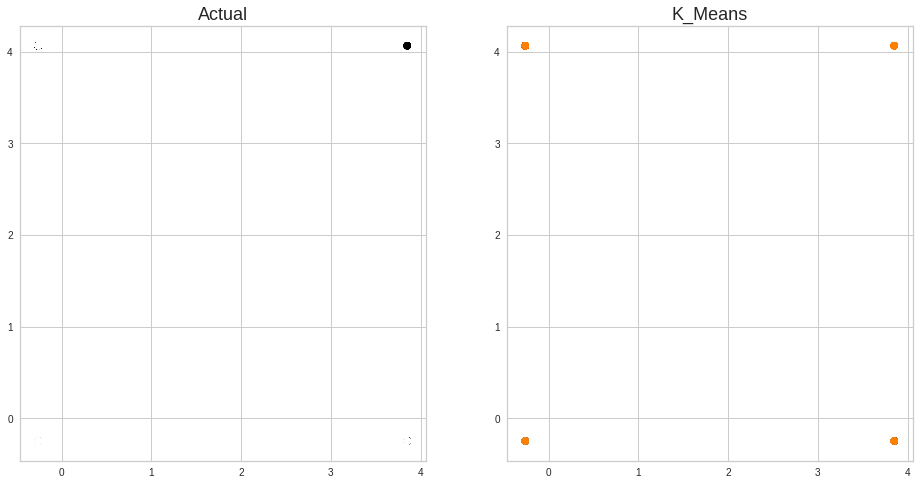

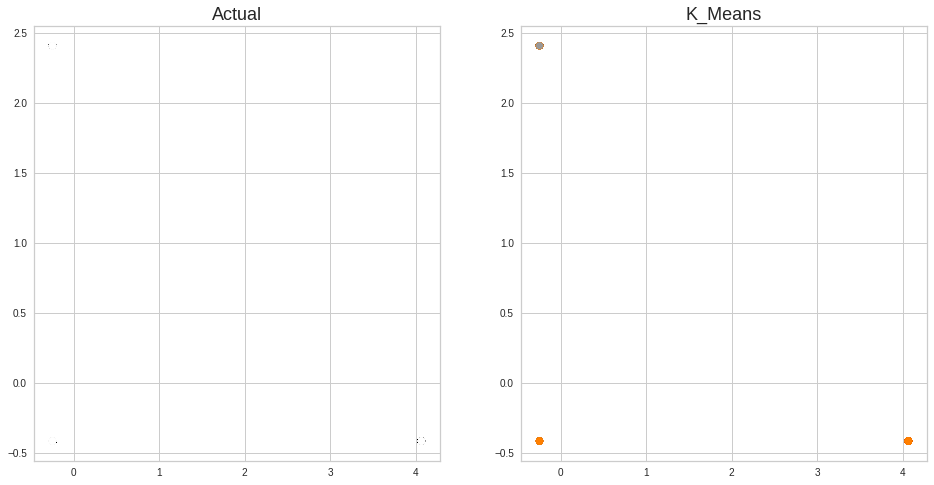

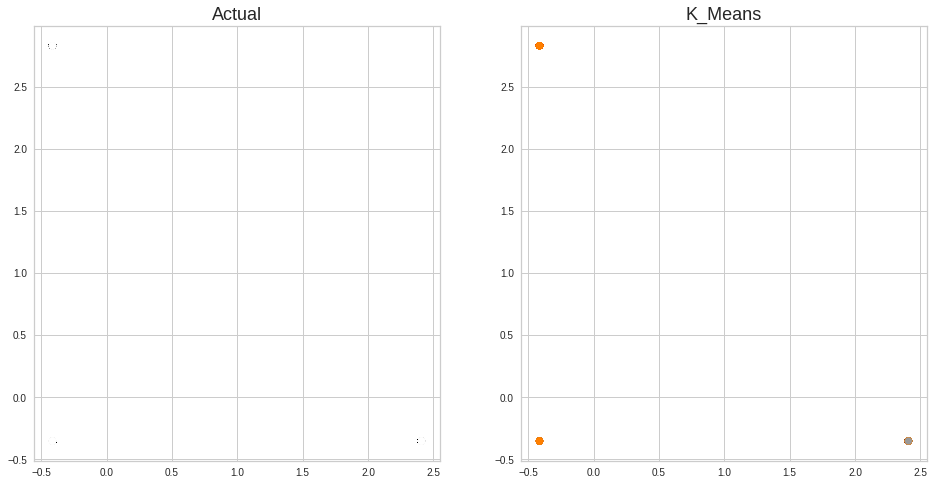

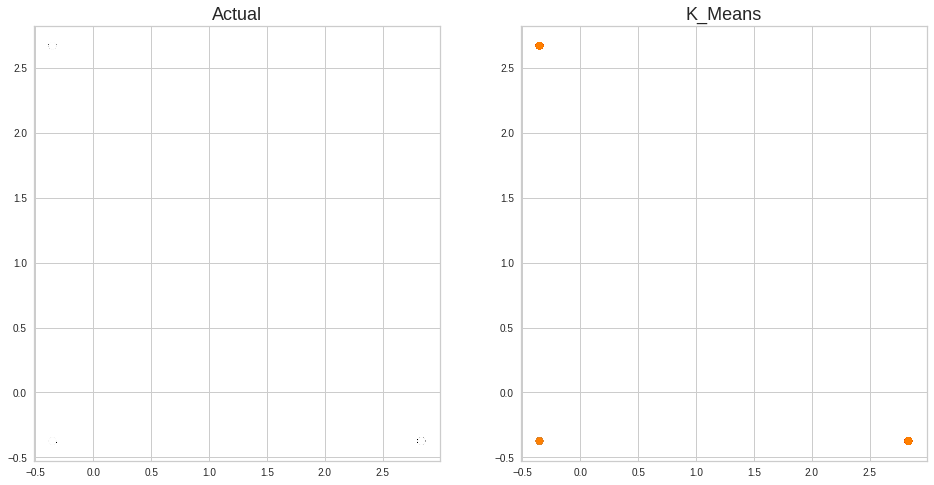

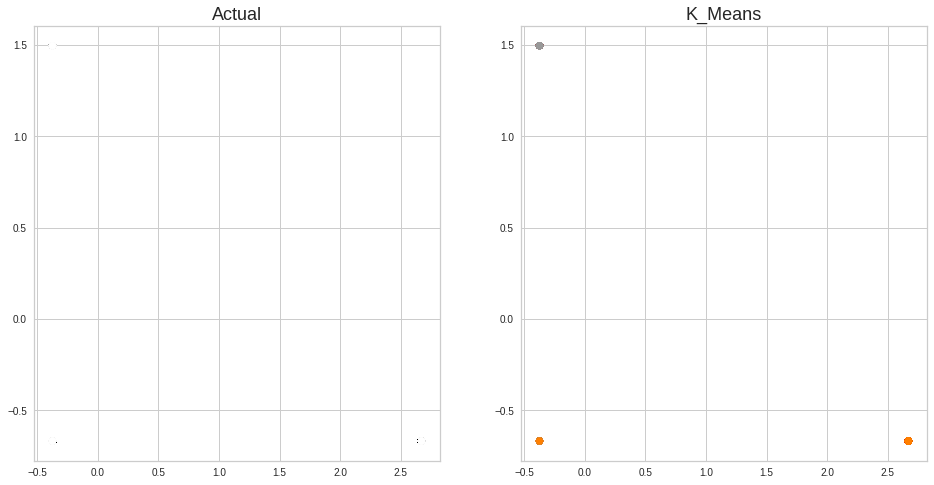

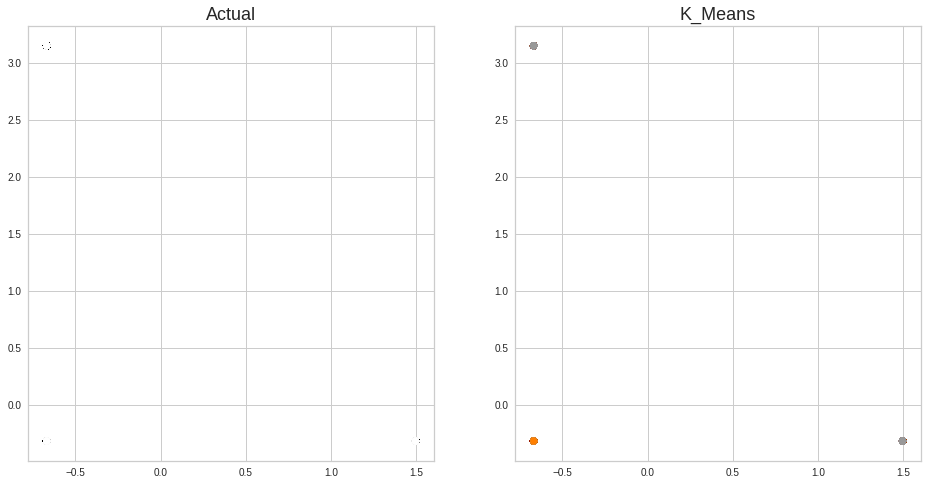

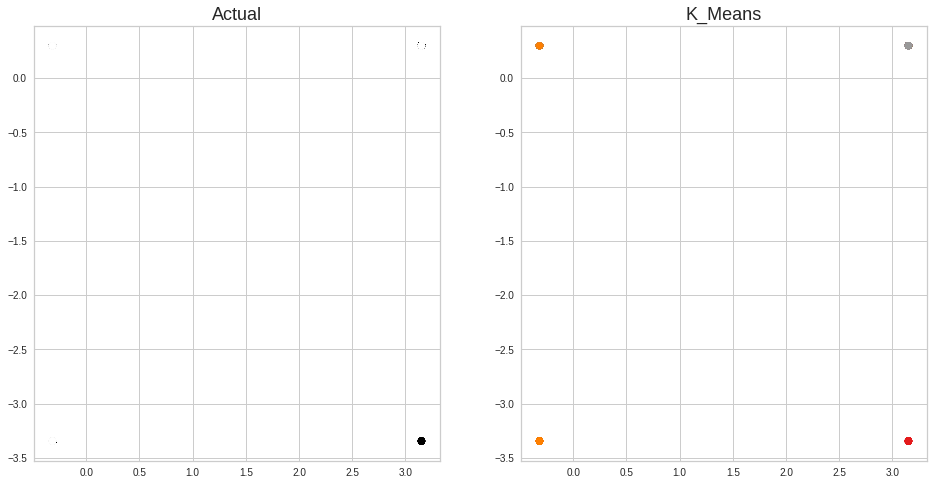

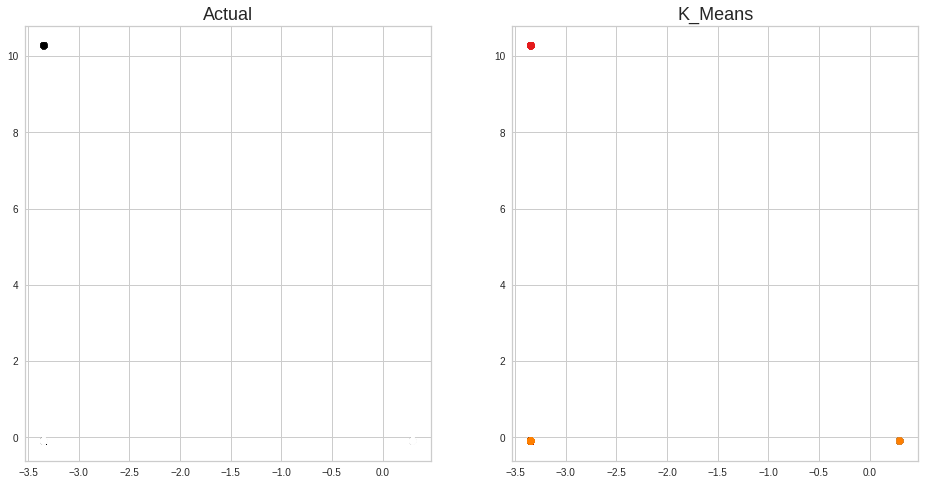

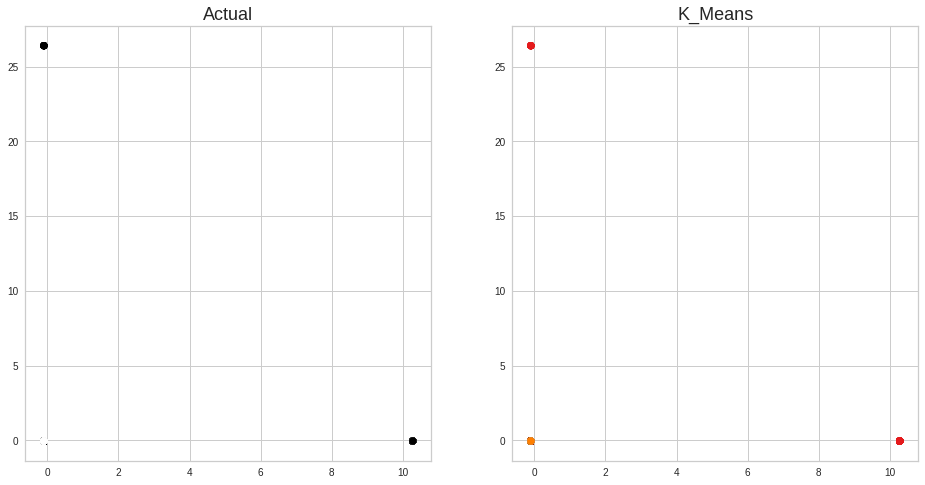

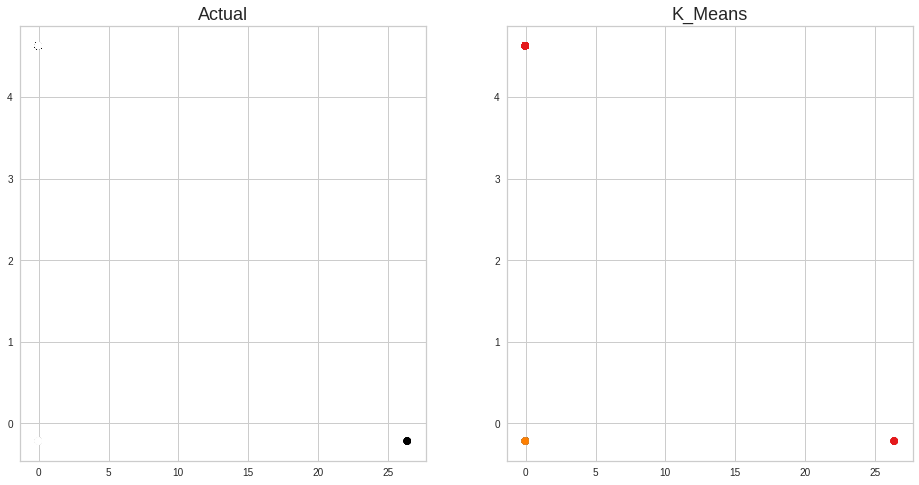

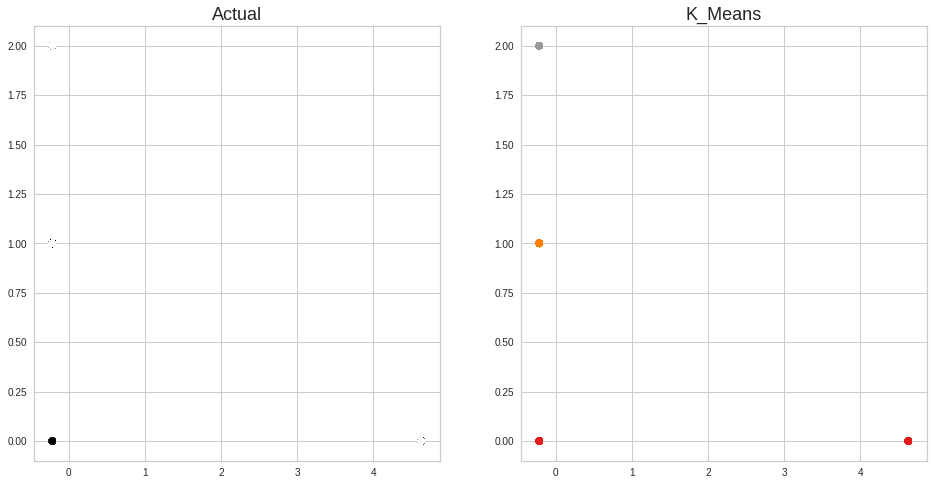

In [149]:
kmeanModel3= KMeans(n_clusters=3, init='k-means++', max_iter=1000, n_init=10, random_state=0)
kmeanModel3.fit(scaled_x_train)
df['k_means']=kmeanModel3.predict(scaled_x_train)
df['target']=y_train_res

for i in range(1,32):
#     print(i)
    fig, axes = plt.subplots(1, 2, figsize=(16,8))
    axes[0].scatter(df.iloc[:,i], df.iloc[:,i+1], c=df['target'])
    axes[1].scatter(df.iloc[:,i], df.iloc[:,i+1], c=df['k_means'], cmap=plt.cm.Set1)
    axes[0].set_title('Actual', fontsize=18)
    axes[1].set_title('K_Means', fontsize=18)

KeyError: '5'

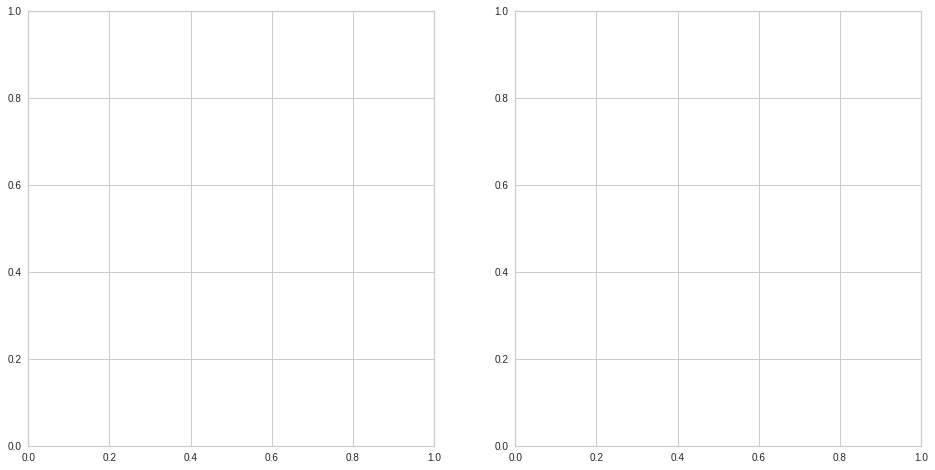

In [151]:


fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df['5'], df['6'], c=df['target'])
axes[1].scatter(df['5'], df['6'], c=df['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

In [13]:
from sklearn.metrics import silhouette_samples, silhouette_score

To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

    Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a
    Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b
    
     If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters. A negative score [-1, 0] indicates that the samples might have got assigned to the wrong clusters.


In [118]:
# Fit the KMeans model
#
kmeans = KMeans(n_clusters=16, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_x_train)
#
# Calculate Silhoutte Score
#
score = silhouette_score(scaled_x_train, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.117


In [111]:
# Fit the KMeans model
#
kmeans = KMeans(n_clusters=14, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(scaled_x_train)
#
# Calculate Silhoutte Score
#
score = silhouette_score(scaled_x_train, kmeans.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.112


In [119]:
from sklearn.manifold import TSNE


In [ ]:
# X = dfskillsPCA.iloc[:,:-1]
Xtsne = TSNE(n_components=14).fit_transform(scaled_x_train)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = skillsPCA_labels
dftsne.columns = ['x1','x2','cluster']

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[0])
ax[0].set_title('Visualized on TSNE 2D')
sns.scatterplot(data=dfskillsPCA2,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,ax=ax[1])
ax[1].set_title('Visualized on PCA 2D')
fig.suptitle('Comparing clustering result when visualized using TSNE2D vs. PCA2D')
display(fig)

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [15]:
import pandas as pd
import numpy as np
from sklearn.neighbors import DistanceMetric


def gower_distance(X):
    """
    This function expects a pandas dataframe as input
    The data frame is to contain the features along the columns. Based on these features a
    distance matrix will be returned which will contain the pairwise gower distance between the rows
    All variables of object type will be treated as nominal variables and the others will be treated as 
    numeric variables.
    Distance metrics used for:
    Nominal variables: Dice distance (https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient)
    Numeric variables: Manhattan distance normalized by the range of the variable (https://en.wikipedia.org/wiki/Taxicab_geometry)
    """
    individual_variable_distances = []

    for i in range(X.shape[1]):
        feature = X.iloc[:,[i]]
        if feature.dtypes[0] == np.object:
            feature_dist = DistanceMetric.get_metric('dice').pairwise(pd.get_dummies(feature))
        else:
            feature_dist = DistanceMetric.get_metric('manhattan').pairwise(feature) / max(np.ptp(feature.values),1)

        individual_variable_distances.append(feature_dist)

    return np.array(individual_variable_distances).mean(0)

In [16]:
# kprot_data = full_data.copy()
# #Pre-processing
# for c in full_data.select_dtypes(exclude='object').columns:
#     pt = PowerTransformer()
#     kprot_data[c] =  pt.fit_transform(np.array(kprot_data[c]).reshape(-1, 1))

# categorical_columns = [0, 4, 5, 7, 11] #make sure to specify correct indices

# #Actual clustering
# kproto = KPrototypes(n_clusters= 15, init='Cao', n_jobs = 4)
# clusters = kproto.fit_predict(kprot_data, categorical=categorical_columns)

# #Prints the count of each cluster group
# pd.Series(clusters).value_counts()

# #OPTIONAL: Elbow plot with cost (will take a LONG time)
# costs = []
# n_clusters = []
# clusters_assigned = []

# for i in tqdm(range(2, 25)):
#     try:
#         kproto = KPrototypes(n_clusters= i, init='Cao', verbose=2)
#         clusters = kproto.fit_predict(kprot_data, categorical=[0, 6, 7, 9, 13])
#         costs.append(kproto.cost_)
#         n_clusters.append(i)
#         clusters_assigned.append(clusters)
#     except:
#         print(f"Can't cluster with {i} clusters")
        

In [18]:
# Fit the KMeans model
#
kmeansGD = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeansGD.fit(scaled_x_train)
#
# Calculate Silhoutte Score
#
score = silhouette_score(scaled_x_train, kmeansGD.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.086


In [ ]:
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(scaled_x_train)


In [ ]:
print(pca.explained_variance_ratio_)

In [ ]:
print(pca.singular_values_)

In [ ]:
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#sphx-glr-auto-examples-preprocessing-plot-scaling-importance-py

In [ ]:
https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()